##Imports

In [3]:
!pip install googletrans==3.1.0a0

     |████████████████████████████████| 55 kB 1.7 MB/s 
     |████████████████████████████████| 42 kB 1.3 MB/s 
     |████████████████████████████████| 1.3 MB 10.8 MB/s 
     |████████████████████████████████| 65 kB 3.3 MB/s 
     |████████████████████████████████| 53 kB 2.2 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=ce6c23b5f84de936c830b6220384f2657197ea82b71054057a55093cebc39058
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans


In [121]:
%matplotlib inline
import os
import re
import nltk
import json
import gensim
import dateutil
import scipy as sp
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from scipy import sparse
from functools import reduce
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn import preprocessing
from IPython.display import Image
from nltk.corpus import stopwords
from googletrans import Translator
from sklearn.metrics import r2_score
sns.set(style="ticks", color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

random_state=2021

In [5]:
!pip install -U textblob

     |████████████████████████████████| 636 kB 4.7 MB/s 
  Attempting uninstall: textblob
    Found existing installation: textblob 0.15.3
    Uninstalling textblob-0.15.3:
      Successfully uninstalled textblob-0.15.3


In [6]:
!pip install advertools

     |████████████████████████████████| 287 kB 5.3 MB/s 
     |████████████████████████████████| 264 kB 53.7 MB/s 
     |████████████████████████████████| 3.1 MB 39.7 MB/s 
     |████████████████████████████████| 47 kB 3.6 MB/s 
     |████████████████████████████████| 55 kB 3.6 MB/s 
     |████████████████████████████████| 87 kB 6.9 MB/s 
     |████████████████████████████████| 251 kB 52.2 MB/s 
     |████████████████████████████████| 3.6 MB 44.8 MB/s 
     |████████████████████████████████| 74 kB 2.1 MB/s 
  Created wheel for PyDispatcher: filename=PyDispatcher-2.0.5-py3-none-any.whl size=11516 sha256=ced3fcdebd9d9b8dd6d6ec25d6a328be18d3908033478747be86ae0bc5a90543
  Stored in directory: /root/.cache/pip/wheels/2d/18/21/3c6a732eaa69a339198e08bb63b7da2c45933a3428b29ec454
Successfully built PyDispatcher


##Import Dataset

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df=pd.read_csv('/content/drive/MyDrive/NLP/final_dataset.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6,9,14,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


##Drop the columns

In [10]:
dropped = ['profile_name', 'profile_image_link', 'biography','id','thumbnails', 'url', 'location','image_url','external_url','media_type','business_email','is_verified']
data = df.drop(dropped,axis=1)
data

,account,caption,following,likes,posts_count,followers,datetime,comments
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1105.0,NaN,515.0,1244.0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,57.0,NaN,8.0,13.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
74544,thesavoylondon,"Alongside hospitality, the performing arts hav...",599.0,4079,1933.0,167394.0,1610730000000.0,67
74545,thesavoylondon,This! Isn’t this what we are looking forward ...,599.0,1621,1933.0,167394.0,1610550000000.0,34
74546,thesavoylondon,"For those of you who are missing London town, ...",599.0,1548,1933.0,167394.0,1610370000000.0,28
74547,thesavoylondon,While we’re closed we’re going to try and keep...,599.0,2637,1933.0,167394.0,1609940000000.0,68


In [11]:
data = data[data['account'].notna()]

In [12]:
data

,account,caption,following,likes,posts_count,followers,datetime,comments
10,chelsea_bridge_clinic,𝗗𝗶𝗱 𝘆𝗼𝘂 𝗸𝗻𝗼𝘄 𝘁𝗵𝗮𝘁 𝘆𝗼𝘂 𝗰𝗮𝗻 𝘁𝗲𝘀𝘁 𝗳𝗼𝗿 𝗖𝗼𝘃𝗶𝗱 𝘄𝗶𝘁𝗵 ...,964.0,14.0,47.0,1093.0,1612780000000.0,0.0
11,chelsea_bridge_clinic,𝗧𝗛𝗔𝗡𝗞 𝗬𝗢𝗨 👏\n.\nWe are very grateful for all t...,964.0,12.0,47.0,1093.0,1611240000000.0,0.0
12,numberoneedin,"Hand dived Isle of Jura scallop, smoked roe, l...",308.0,100.0,343.0,4202.0,1645290000000.0,2.0
13,numberoneedin,Jerusalem Artichoke prepared as your first des...,308.0,81.0,343.0,4202.0,1643660000000.0,1.0
14,numberoneedin,Main course from our seasonal 7 course menu: B...,308.0,146.0,343.0,4202.0,1643220000000.0,1.0
...,...,...,...,...,...,...,...,...
74544,thesavoylondon,"Alongside hospitality, the performing arts hav...",599.0,4079,1933.0,167394.0,1610730000000.0,67
74545,thesavoylondon,This! Isn’t this what we are looking forward ...,599.0,1621,1933.0,167394.0,1610550000000.0,34
74546,thesavoylondon,"For those of you who are missing London town, ...",599.0,1548,1933.0,167394.0,1610370000000.0,28
74547,thesavoylondon,While we’re closed we’re going to try and keep...,599.0,2637,1933.0,167394.0,1609940000000.0,68


In [13]:
rm_list = []

for i in range(data.shape[0]):
    if type(data["datetime"].values[i]) != float:
        rm_list.append(i)


len(rm_list)
for i in rm_list:
    data.drop([i], axis=0, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
#Converting the columns into the float datatype
a=['following','likes','posts_count','followers','comments']
for i in a:
  data[i]= data[i].astype(str).astype(float)
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,account,caption,following,likes,posts_count,followers,datetime,comments
10,chelsea_bridge_clinic,𝗗𝗶𝗱 𝘆𝗼𝘂 𝗸𝗻𝗼𝘄 𝘁𝗵𝗮𝘁 𝘆𝗼𝘂 𝗰𝗮𝗻 𝘁𝗲𝘀𝘁 𝗳𝗼𝗿 𝗖𝗼𝘃𝗶𝗱 𝘄𝗶𝘁𝗵 ...,964.0,14.0,47.0,1093.0,1612780000000.0,0.0
11,chelsea_bridge_clinic,𝗧𝗛𝗔𝗡𝗞 𝗬𝗢𝗨 👏\n.\nWe are very grateful for all t...,964.0,12.0,47.0,1093.0,1611240000000.0,0.0
12,numberoneedin,"Hand dived Isle of Jura scallop, smoked roe, l...",308.0,100.0,343.0,4202.0,1645290000000.0,2.0
13,numberoneedin,Jerusalem Artichoke prepared as your first des...,308.0,81.0,343.0,4202.0,1643660000000.0,1.0
14,numberoneedin,Main course from our seasonal 7 course menu: B...,308.0,146.0,343.0,4202.0,1643220000000.0,1.0
...,...,...,...,...,...,...,...,...
74544,thesavoylondon,"Alongside hospitality, the performing arts hav...",599.0,4079.0,1933.0,167394.0,1610730000000.0,67.0
74545,thesavoylondon,This! Isn’t this what we are looking forward ...,599.0,1621.0,1933.0,167394.0,1610550000000.0,34.0
74546,thesavoylondon,"For those of you who are missing London town, ...",599.0,1548.0,1933.0,167394.0,1610370000000.0,28.0
74547,thesavoylondon,While we’re closed we’re going to try and keep...,599.0,2637.0,1933.0,167394.0,1609940000000.0,68.0


In [15]:
# data['engagement_factor'] =round(data['likes']*data['comments']/data['followers'],2)

#Numerical Features

##Conversion of date to timestamp

In [16]:
data['datetime'].value_counts()

1.643910e+12    68
1.642530e+12    68
1.644860e+12    64
1.642010e+12    60
1.640430e+12    60
                ..
1.625260e+12     1
1.644720e+12     1
1.614900e+12     1
1.636770e+12     1
1.623900e+12     1
Name: datetime, Length: 3084, dtype: int64

In [17]:
data.loc[data['datetime'] == 'j_kzvc99wm2q4pjru5kn.f75e5d531a208bf3bdf3435c403835818912c0de.file_kzvfx1gxf4g1f2vj2.image_url.jpg']

,account,caption,following,likes,posts_count,followers,datetime,comments


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41741 entries, 10 to 74548
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   account      41741 non-null  object 
 1   caption      41554 non-null  object 
 2   following    41741 non-null  float64
 3   likes        41741 non-null  float64
 4   posts_count  41741 non-null  float64
 5   followers    41741 non-null  float64
 6   datetime     41741 non-null  object 
 7   comments     41741 non-null  float64
dtypes: float64(5), object(3)
memory usage: 2.9+ MB


In [19]:
import datetime
def timeStampConversion(x):
    return datetime.datetime.fromtimestamp(int(x)/1000)

In [20]:
data['datetime'] = pd.to_numeric(data['datetime'], downcast="float")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
data['datetime'] = data['datetime'].apply(lambda x: timeStampConversion(x)) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
data

,account,caption,following,likes,posts_count,followers,datetime,comments
10,chelsea_bridge_clinic,𝗗𝗶𝗱 𝘆𝗼𝘂 𝗸𝗻𝗼𝘄 𝘁𝗵𝗮𝘁 𝘆𝗼𝘂 𝗰𝗮𝗻 𝘁𝗲𝘀𝘁 𝗳𝗼𝗿 𝗖𝗼𝘃𝗶𝗱 𝘄𝗶𝘁𝗵 ...,964.0,14.0,47.0,1093.0,2021-02-08 10:26:51.520,0.0
11,chelsea_bridge_clinic,𝗧𝗛𝗔𝗡𝗞 𝗬𝗢𝗨 👏\n.\nWe are very grateful for all t...,964.0,12.0,47.0,1093.0,2021-01-21 14:40:46.592,0.0
12,numberoneedin,"Hand dived Isle of Jura scallop, smoked roe, l...",308.0,100.0,343.0,4202.0,2022-02-19 17:01:01.824,2.0
13,numberoneedin,Jerusalem Artichoke prepared as your first des...,308.0,81.0,343.0,4202.0,2022-01-31 20:14:10.432,1.0
14,numberoneedin,Main course from our seasonal 7 course menu: B...,308.0,146.0,343.0,4202.0,2022-01-26 18:00:41.728,1.0
...,...,...,...,...,...,...,...,...
74544,thesavoylondon,"Alongside hospitality, the performing arts hav...",599.0,4079.0,1933.0,167394.0,2021-01-15 17:00:45.440,67.0
74545,thesavoylondon,This! Isn’t this what we are looking forward ...,599.0,1621.0,1933.0,167394.0,2021-01-13 14:59:12.512,34.0
74546,thesavoylondon,"For those of you who are missing London town, ...",599.0,1548.0,1933.0,167394.0,2021-01-11 12:59:50.656,28.0
74547,thesavoylondon,While we’re closed we’re going to try and keep...,599.0,2637.0,1933.0,167394.0,2021-01-06 13:32:23.424,68.0


In [23]:
data["datetime"] = pd.to_datetime(data["datetime"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41741 entries, 10 to 74548
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   account      41741 non-null  object        
 1   caption      41554 non-null  object        
 2   following    41741 non-null  float64       
 3   likes        41741 non-null  float64       
 4   posts_count  41741 non-null  float64       
 5   followers    41741 non-null  float64       
 6   datetime     41741 non-null  datetime64[ns]
 7   comments     41741 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 2.9+ MB


In [25]:
data['Dow'] = data['datetime'].dt.weekday
data['Hod']= data['datetime'].dt.hour
data['Date']= data['datetime'].dt.date

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [26]:
data

,account,caption,following,likes,posts_count,followers,datetime,comments,Dow,Hod,Date
10,chelsea_bridge_clinic,𝗗𝗶𝗱 𝘆𝗼𝘂 𝗸𝗻𝗼𝘄 𝘁𝗵𝗮𝘁 𝘆𝗼𝘂 𝗰𝗮𝗻 𝘁𝗲𝘀𝘁 𝗳𝗼𝗿 𝗖𝗼𝘃𝗶𝗱 𝘄𝗶𝘁𝗵 ...,964.0,14.0,47.0,1093.0,2021-02-08 10:26:51.520,0.0,0,10,2021-02-08
11,chelsea_bridge_clinic,𝗧𝗛𝗔𝗡𝗞 𝗬𝗢𝗨 👏\n.\nWe are very grateful for all t...,964.0,12.0,47.0,1093.0,2021-01-21 14:40:46.592,0.0,3,14,2021-01-21
12,numberoneedin,"Hand dived Isle of Jura scallop, smoked roe, l...",308.0,100.0,343.0,4202.0,2022-02-19 17:01:01.824,2.0,5,17,2022-02-19
13,numberoneedin,Jerusalem Artichoke prepared as your first des...,308.0,81.0,343.0,4202.0,2022-01-31 20:14:10.432,1.0,0,20,2022-01-31
14,numberoneedin,Main course from our seasonal 7 course menu: B...,308.0,146.0,343.0,4202.0,2022-01-26 18:00:41.728,1.0,2,18,2022-01-26
...,...,...,...,...,...,...,...,...,...,...,...
74544,thesavoylondon,"Alongside hospitality, the performing arts hav...",599.0,4079.0,1933.0,167394.0,2021-01-15 17:00:45.440,67.0,4,17,2021-01-15
74545,thesavoylondon,This! Isn’t this what we are looking forward ...,599.0,1621.0,1933.0,167394.0,2021-01-13 14:59:12.512,34.0,2,14,2021-01-13
74546,thesavoylondon,"For those of you who are missing London town, ...",599.0,1548.0,1933.0,167394.0,2021-01-11 12:59:50.656,28.0,0,12,2021-01-11
74547,thesavoylondon,While we’re closed we’re going to try and keep...,599.0,2637.0,1933.0,167394.0,2021-01-06 13:32:23.424,68.0,2,13,2021-01-06


In [27]:
data['mon']=(data['Dow']==0).astype(int)
data['tue']=(data['Dow']==1).astype(int)
data['wed']=(data['Dow']==2).astype(int)
data['thu']=(data['Dow']==3).astype(int)
data['fri']=(data['Dow']==4).astype(int)
data['sat']=(data['Dow']==5).astype(int)
data['sun']=(data['Dow']==6).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [28]:
data = data.drop(['Dow'], axis=1)

In [29]:
data

,account,caption,following,likes,posts_count,followers,datetime,comments,Hod,Date,mon,tue,wed,thu,fri,sat,sun
10,chelsea_bridge_clinic,𝗗𝗶𝗱 𝘆𝗼𝘂 𝗸𝗻𝗼𝘄 𝘁𝗵𝗮𝘁 𝘆𝗼𝘂 𝗰𝗮𝗻 𝘁𝗲𝘀𝘁 𝗳𝗼𝗿 𝗖𝗼𝘃𝗶𝗱 𝘄𝗶𝘁𝗵 ...,964.0,14.0,47.0,1093.0,2021-02-08 10:26:51.520,0.0,10,2021-02-08,1,0,0,0,0,0,0
11,chelsea_bridge_clinic,𝗧𝗛𝗔𝗡𝗞 𝗬𝗢𝗨 👏\n.\nWe are very grateful for all t...,964.0,12.0,47.0,1093.0,2021-01-21 14:40:46.592,0.0,14,2021-01-21,0,0,0,1,0,0,0
12,numberoneedin,"Hand dived Isle of Jura scallop, smoked roe, l...",308.0,100.0,343.0,4202.0,2022-02-19 17:01:01.824,2.0,17,2022-02-19,0,0,0,0,0,1,0
13,numberoneedin,Jerusalem Artichoke prepared as your first des...,308.0,81.0,343.0,4202.0,2022-01-31 20:14:10.432,1.0,20,2022-01-31,1,0,0,0,0,0,0
14,numberoneedin,Main course from our seasonal 7 course menu: B...,308.0,146.0,343.0,4202.0,2022-01-26 18:00:41.728,1.0,18,2022-01-26,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74544,thesavoylondon,"Alongside hospitality, the performing arts hav...",599.0,4079.0,1933.0,167394.0,2021-01-15 17:00:45.440,67.0,17,2021-01-15,0,0,0,0,1,0,0
74545,thesavoylondon,This! Isn’t this what we are looking forward ...,599.0,1621.0,1933.0,167394.0,2021-01-13 14:59:12.512,34.0,14,2021-01-13,0,0,1,0,0,0,0
74546,thesavoylondon,"For those of you who are missing London town, ...",599.0,1548.0,1933.0,167394.0,2021-01-11 12:59:50.656,28.0,12,2021-01-11,1,0,0,0,0,0,0
74547,thesavoylondon,While we’re closed we’re going to try and keep...,599.0,2637.0,1933.0,167394.0,2021-01-06 13:32:23.424,68.0,13,2021-01-06,0,0,1,0,0,0,0


In [30]:
data.drop(['datetime'], axis=1, inplace=True)

In [31]:
data.head()

,account,caption,following,likes,posts_count,followers,comments,Hod,Date,mon,tue,wed,thu,fri,sat,sun
10,chelsea_bridge_clinic,𝗗𝗶𝗱 𝘆𝗼𝘂 𝗸𝗻𝗼𝘄 𝘁𝗵𝗮𝘁 𝘆𝗼𝘂 𝗰𝗮𝗻 𝘁𝗲𝘀𝘁 𝗳𝗼𝗿 𝗖𝗼𝘃𝗶𝗱 𝘄𝗶𝘁𝗵 ...,964.0,14.0,47.0,1093.0,0.0,10,2021-02-08,1,0,0,0,0,0,0
11,chelsea_bridge_clinic,𝗧𝗛𝗔𝗡𝗞 𝗬𝗢𝗨 👏\n.\nWe are very grateful for all t...,964.0,12.0,47.0,1093.0,0.0,14,2021-01-21,0,0,0,1,0,0,0
12,numberoneedin,"Hand dived Isle of Jura scallop, smoked roe, l...",308.0,100.0,343.0,4202.0,2.0,17,2022-02-19,0,0,0,0,0,1,0
13,numberoneedin,Jerusalem Artichoke prepared as your first des...,308.0,81.0,343.0,4202.0,1.0,20,2022-01-31,1,0,0,0,0,0,0
14,numberoneedin,Main course from our seasonal 7 course menu: B...,308.0,146.0,343.0,4202.0,1.0,18,2022-01-26,0,0,1,0,0,0,0


In [32]:
a=df['account'].nunique(dropna = True)

In [33]:
data1 = data.iloc[:]

In [34]:
print(data1.shape, data.shape)

(41741, 16) (41741, 16)


In [35]:
# data1.set_index('account')
data1.head()

,account,caption,following,likes,posts_count,followers,comments,Hod,Date,mon,tue,wed,thu,fri,sat,sun
10,chelsea_bridge_clinic,𝗗𝗶𝗱 𝘆𝗼𝘂 𝗸𝗻𝗼𝘄 𝘁𝗵𝗮𝘁 𝘆𝗼𝘂 𝗰𝗮𝗻 𝘁𝗲𝘀𝘁 𝗳𝗼𝗿 𝗖𝗼𝘃𝗶𝗱 𝘄𝗶𝘁𝗵 ...,964.0,14.0,47.0,1093.0,0.0,10,2021-02-08,1,0,0,0,0,0,0
11,chelsea_bridge_clinic,𝗧𝗛𝗔𝗡𝗞 𝗬𝗢𝗨 👏\n.\nWe are very grateful for all t...,964.0,12.0,47.0,1093.0,0.0,14,2021-01-21,0,0,0,1,0,0,0
12,numberoneedin,"Hand dived Isle of Jura scallop, smoked roe, l...",308.0,100.0,343.0,4202.0,2.0,17,2022-02-19,0,0,0,0,0,1,0
13,numberoneedin,Jerusalem Artichoke prepared as your first des...,308.0,81.0,343.0,4202.0,1.0,20,2022-01-31,1,0,0,0,0,0,0
14,numberoneedin,Main course from our seasonal 7 course menu: B...,308.0,146.0,343.0,4202.0,1.0,18,2022-01-26,0,0,1,0,0,0,0


In [36]:
data1.shape

(41741, 16)

##average_five_recent_likes

In [37]:
data1[data1['account'] == 0]['likes'].aggregate('mean')

nan

In [38]:
a = data1.groupby(by = ['account'])['likes'].aggregate('mean').to_frame('avg_likes')
a.head()

,avg_likes
account,
108harleystreet,4.541667
111skin,276.060606
144onthehill,49.250000
1gemmaclare,59.857143
2magpiesbakery,321.625000


In [39]:
x = pd.merge(data1, a, on = 'account')

In [40]:
x

,account,caption,following,likes,posts_count,followers,comments,Hod,Date,mon,tue,wed,thu,fri,sat,sun,avg_likes
0,chelsea_bridge_clinic,𝗗𝗶𝗱 𝘆𝗼𝘂 𝗸𝗻𝗼𝘄 𝘁𝗵𝗮𝘁 𝘆𝗼𝘂 𝗰𝗮𝗻 𝘁𝗲𝘀𝘁 𝗳𝗼𝗿 𝗖𝗼𝘃𝗶𝗱 𝘄𝗶𝘁𝗵 ...,964.0,14.0,47.0,1093.0,0.0,10,2021-02-08,1,0,0,0,0,0,0,13.000000
1,chelsea_bridge_clinic,𝗧𝗛𝗔𝗡𝗞 𝗬𝗢𝗨 👏\n.\nWe are very grateful for all t...,964.0,12.0,47.0,1093.0,0.0,14,2021-01-21,0,0,0,1,0,0,0,13.000000
2,numberoneedin,"Hand dived Isle of Jura scallop, smoked roe, l...",308.0,100.0,343.0,4202.0,2.0,17,2022-02-19,0,0,0,0,0,1,0,128.125000
3,numberoneedin,Jerusalem Artichoke prepared as your first des...,308.0,81.0,343.0,4202.0,1.0,20,2022-01-31,1,0,0,0,0,0,0,128.125000
4,numberoneedin,Main course from our seasonal 7 course menu: B...,308.0,146.0,343.0,4202.0,1.0,18,2022-01-26,0,0,1,0,0,0,0,128.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,royalcrescent_hotel,Our team of gardeners ensure that every month ...,1290.0,97.0,1118.0,11336.0,0.0,11,2021-05-31,1,0,0,0,0,0,0,179.297872
41737,royalcrescent_hotel,Here's to the Bank Holiday weekend! 🍹\n\n📸 @ka...,1290.0,125.0,1118.0,11336.0,2.0,16,2021-05-28,0,0,0,0,1,0,0,179.297872
41738,royalcrescent_hotel,Amongst our favourite sights in late spring is...,1290.0,125.0,1118.0,11336.0,1.0,7,2021-05-27,0,0,0,1,0,0,0,179.297872
41739,royalcrescent_hotel,Our new awards have just arrived from the Sout...,1290.0,107.0,1118.0,11336.0,6.0,11,2021-05-26,0,0,1,0,0,0,0,179.297872


In [41]:
pd.DataFrame(data1.groupby(by=['account'])['likes']).iloc[0][1]

9097     4.0
9098     4.0
9099     3.0
9100     5.0
9101     6.0
9102     8.0
9103     3.0
9104     6.0
9105     5.0
9106     8.0
9107     5.0
9108     2.0
9109     6.0
9110     3.0
9111     6.0
9112     1.0
9113     2.0
9114     4.0
9115     3.0
9116     6.0
9117     3.0
9118     3.0
9119     2.0
9120    11.0
Name: likes, dtype: float64

In [42]:
recent_likes=data1.groupby(by=['account'])['likes'].apply(lambda x: x.tail(5).mean())

In [43]:
x = pd.merge(x, recent_likes, on = 'account')

In [44]:
x.rename({'likes_y': 'average_five_recent_likes'}, axis=1, inplace=True)
x

,account,caption,following,likes_x,posts_count,followers,comments,Hod,Date,mon,tue,wed,thu,fri,sat,sun,avg_likes,average_five_recent_likes
0,chelsea_bridge_clinic,𝗗𝗶𝗱 𝘆𝗼𝘂 𝗸𝗻𝗼𝘄 𝘁𝗵𝗮𝘁 𝘆𝗼𝘂 𝗰𝗮𝗻 𝘁𝗲𝘀𝘁 𝗳𝗼𝗿 𝗖𝗼𝘃𝗶𝗱 𝘄𝗶𝘁𝗵 ...,964.0,14.0,47.0,1093.0,0.0,10,2021-02-08,1,0,0,0,0,0,0,13.000000,13.0
1,chelsea_bridge_clinic,𝗧𝗛𝗔𝗡𝗞 𝗬𝗢𝗨 👏\n.\nWe are very grateful for all t...,964.0,12.0,47.0,1093.0,0.0,14,2021-01-21,0,0,0,1,0,0,0,13.000000,13.0
2,numberoneedin,"Hand dived Isle of Jura scallop, smoked roe, l...",308.0,100.0,343.0,4202.0,2.0,17,2022-02-19,0,0,0,0,0,1,0,128.125000,158.6
3,numberoneedin,Jerusalem Artichoke prepared as your first des...,308.0,81.0,343.0,4202.0,1.0,20,2022-01-31,1,0,0,0,0,0,0,128.125000,158.6
4,numberoneedin,Main course from our seasonal 7 course menu: B...,308.0,146.0,343.0,4202.0,1.0,18,2022-01-26,0,0,1,0,0,0,0,128.125000,158.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,royalcrescent_hotel,Our team of gardeners ensure that every month ...,1290.0,97.0,1118.0,11336.0,0.0,11,2021-05-31,1,0,0,0,0,0,0,179.297872,121.2
41737,royalcrescent_hotel,Here's to the Bank Holiday weekend! 🍹\n\n📸 @ka...,1290.0,125.0,1118.0,11336.0,2.0,16,2021-05-28,0,0,0,0,1,0,0,179.297872,121.2
41738,royalcrescent_hotel,Amongst our favourite sights in late spring is...,1290.0,125.0,1118.0,11336.0,1.0,7,2021-05-27,0,0,0,1,0,0,0,179.297872,121.2
41739,royalcrescent_hotel,Our new awards have just arrived from the Sout...,1290.0,107.0,1118.0,11336.0,6.0,11,2021-05-26,0,0,1,0,0,0,0,179.297872,121.2


In [45]:
data=x

In [46]:
data.shape

(41741, 18)

##Label Encoding

In [47]:
le = preprocessing.LabelEncoder()
le.fit(data["account"])
list(le.classes_)
account_num=le.transform(data["account"])
data["account"]=account_num

In [48]:
type(data)

pandas.core.frame.DataFrame

In [49]:
data.drop(['comments'], axis=1, inplace=True)

In [50]:
data.drop(['Date'], axis=1, inplace=True)

In [51]:
data=data.astype(str)

#NLP Features

In [52]:
from textblob import TextBlob


def sentiment_analysis(caption):
 def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity
  
 #Create a function to get the polarity
 def getPolarity(caption):
   return TextBlob(caption).sentiment.polarity
  
 #Create two new columns ‘Subjectivity’ & ‘Polarity’
 data['TextBlob_Subjectivity'] =    data['caption'].apply(getSubjectivity)
 data ['TextBlob_Polarity'] = data['caption'].apply(getPolarity)


 def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'


 data ['TextBlob_Analysis'] = data['TextBlob_Polarity'].apply(getAnalysis )
 return data

In [53]:
sentiment_analysis(data['caption'])

,account,caption,following,likes_x,posts_count,followers,Hod,mon,tue,wed,thu,fri,sat,sun,avg_likes,average_five_recent_likes,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
0,98,𝗗𝗶𝗱 𝘆𝗼𝘂 𝗸𝗻𝗼𝘄 𝘁𝗵𝗮𝘁 𝘆𝗼𝘂 𝗰𝗮𝗻 𝘁𝗲𝘀𝘁 𝗳𝗼𝗿 𝗖𝗼𝘃𝗶𝗱 𝘄𝗶𝘁𝗵 ...,964.0,14.0,47.0,1093.0,10,1,0,0,0,0,0,0,13.0,13.0,0.632390,0.282576,Positive
1,98,𝗧𝗛𝗔𝗡𝗞 𝗬𝗢𝗨 👏\n.\nWe are very grateful for all t...,964.0,12.0,47.0,1093.0,14,0,0,0,1,0,0,0,13.0,13.0,0.405556,0.168056,Positive
2,416,"Hand dived Isle of Jura scallop, smoked roe, l...",308.0,100.0,343.0,4202.0,17,0,0,0,0,0,1,0,128.125,158.6,0.000000,0.000000,Neutral
3,416,Jerusalem Artichoke prepared as your first des...,308.0,81.0,343.0,4202.0,20,1,0,0,0,0,0,0,128.125,158.6,0.333333,0.250000,Positive
4,416,Main course from our seasonal 7 course menu: B...,308.0,146.0,343.0,4202.0,18,0,0,1,0,0,0,0,128.125,158.6,0.333333,0.166667,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,471,Our team of gardeners ensure that every month ...,1290.0,97.0,1118.0,11336.0,11,1,0,0,0,0,0,0,179.29787234042553,121.2,0.560909,0.322273,Positive
41737,471,Here's to the Bank Holiday weekend! 🍹\n\n📸 @ka...,1290.0,125.0,1118.0,11336.0,16,0,0,0,0,1,0,0,179.29787234042553,121.2,0.000000,0.000000,Neutral
41738,471,Amongst our favourite sights in late spring is...,1290.0,125.0,1118.0,11336.0,7,0,0,0,1,0,0,0,179.29787234042553,121.2,0.516667,-0.280208,Negative
41739,471,Our new awards have just arrived from the Sout...,1290.0,107.0,1118.0,11336.0,11,0,0,1,0,0,0,0,179.29787234042553,121.2,0.643615,0.396834,Positive


In [54]:
data.dtypes

account                       object
caption                       object
following                     object
likes_x                       object
posts_count                   object
followers                     object
Hod                           object
mon                           object
tue                           object
wed                           object
thu                           object
fri                           object
sat                           object
sun                           object
avg_likes                     object
average_five_recent_likes     object
TextBlob_Subjectivity        float64
TextBlob_Polarity            float64
TextBlob_Analysis             object
dtype: object

In [55]:
dropped = ['TextBlob_Polarity','TextBlob_Subjectivity']
data = data.drop(dropped,axis=1)
data

,account,caption,following,likes_x,posts_count,followers,Hod,mon,tue,wed,thu,fri,sat,sun,avg_likes,average_five_recent_likes,TextBlob_Analysis
0,98,𝗗𝗶𝗱 𝘆𝗼𝘂 𝗸𝗻𝗼𝘄 𝘁𝗵𝗮𝘁 𝘆𝗼𝘂 𝗰𝗮𝗻 𝘁𝗲𝘀𝘁 𝗳𝗼𝗿 𝗖𝗼𝘃𝗶𝗱 𝘄𝗶𝘁𝗵 ...,964.0,14.0,47.0,1093.0,10,1,0,0,0,0,0,0,13.0,13.0,Positive
1,98,𝗧𝗛𝗔𝗡𝗞 𝗬𝗢𝗨 👏\n.\nWe are very grateful for all t...,964.0,12.0,47.0,1093.0,14,0,0,0,1,0,0,0,13.0,13.0,Positive
2,416,"Hand dived Isle of Jura scallop, smoked roe, l...",308.0,100.0,343.0,4202.0,17,0,0,0,0,0,1,0,128.125,158.6,Neutral
3,416,Jerusalem Artichoke prepared as your first des...,308.0,81.0,343.0,4202.0,20,1,0,0,0,0,0,0,128.125,158.6,Positive
4,416,Main course from our seasonal 7 course menu: B...,308.0,146.0,343.0,4202.0,18,0,0,1,0,0,0,0,128.125,158.6,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,471,Our team of gardeners ensure that every month ...,1290.0,97.0,1118.0,11336.0,11,1,0,0,0,0,0,0,179.29787234042553,121.2,Positive
41737,471,Here's to the Bank Holiday weekend! 🍹\n\n📸 @ka...,1290.0,125.0,1118.0,11336.0,16,0,0,0,0,1,0,0,179.29787234042553,121.2,Neutral
41738,471,Amongst our favourite sights in late spring is...,1290.0,125.0,1118.0,11336.0,7,0,0,0,1,0,0,0,179.29787234042553,121.2,Negative
41739,471,Our new awards have just arrived from the Sout...,1290.0,107.0,1118.0,11336.0,11,0,0,1,0,0,0,0,179.29787234042553,121.2,Positive


In [56]:
data = data.iloc[: , 1:]

In [57]:
data

,caption,following,likes_x,posts_count,followers,Hod,mon,tue,wed,thu,fri,sat,sun,avg_likes,average_five_recent_likes,TextBlob_Analysis
0,𝗗𝗶𝗱 𝘆𝗼𝘂 𝗸𝗻𝗼𝘄 𝘁𝗵𝗮𝘁 𝘆𝗼𝘂 𝗰𝗮𝗻 𝘁𝗲𝘀𝘁 𝗳𝗼𝗿 𝗖𝗼𝘃𝗶𝗱 𝘄𝗶𝘁𝗵 ...,964.0,14.0,47.0,1093.0,10,1,0,0,0,0,0,0,13.0,13.0,Positive
1,𝗧𝗛𝗔𝗡𝗞 𝗬𝗢𝗨 👏\n.\nWe are very grateful for all t...,964.0,12.0,47.0,1093.0,14,0,0,0,1,0,0,0,13.0,13.0,Positive
2,"Hand dived Isle of Jura scallop, smoked roe, l...",308.0,100.0,343.0,4202.0,17,0,0,0,0,0,1,0,128.125,158.6,Neutral
3,Jerusalem Artichoke prepared as your first des...,308.0,81.0,343.0,4202.0,20,1,0,0,0,0,0,0,128.125,158.6,Positive
4,Main course from our seasonal 7 course menu: B...,308.0,146.0,343.0,4202.0,18,0,0,1,0,0,0,0,128.125,158.6,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,Our team of gardeners ensure that every month ...,1290.0,97.0,1118.0,11336.0,11,1,0,0,0,0,0,0,179.29787234042553,121.2,Positive
41737,Here's to the Bank Holiday weekend! 🍹\n\n📸 @ka...,1290.0,125.0,1118.0,11336.0,16,0,0,0,0,1,0,0,179.29787234042553,121.2,Neutral
41738,Amongst our favourite sights in late spring is...,1290.0,125.0,1118.0,11336.0,7,0,0,0,1,0,0,0,179.29787234042553,121.2,Negative
41739,Our new awards have just arrived from the Sout...,1290.0,107.0,1118.0,11336.0,11,0,0,1,0,0,0,0,179.29787234042553,121.2,Positive


In [58]:
import advertools as adv

hashtag_summary = adv.extract_hashtags(data['caption'])
hashtag_summary.keys()

dict_keys(['hashtags', 'hashtags_flat', 'hashtag_counts', 'hashtag_freq', 'top_hashtags', 'overview'])

In [59]:
hashtag_summary['hashtag_freq'][:10]

[(0, 14969),
 (1, 2732),
 (2, 1567),
 (3, 2018),
 (4, 1524),
 (5, 1581),
 (6, 1420),
 (7, 1332),
 (8, 1335),
 (9, 1134)]

##emoji

In [60]:
emoji_summary = adv.extract_emoji(data['caption'])
emoji_summary.keys()

dict_keys(['emoji', 'emoji_text', 'emoji_flat', 'emoji_flat_text', 'emoji_counts', 'emoji_freq', 'top_emoji', 'top_emoji_text', 'top_emoji_groups', 'top_emoji_sub_groups', 'overview'])

In [61]:
top_emoji_text=emoji_summary['top_emoji_text']
top_emoji_text

[('sparkles', 3657),
 ('camera with flash', 2149),
 ('red heart', 2074),
 ('smiling face with heart-eyes', 1753),
 ('Christmas tree', 1189),
 ('star', 1176),
 ('white heart', 1161),
 ('telephone receiver', 1029),
 ('telephone', 1020),
 ('black small square', 992),
 ('round pushpin', 952),
 ('party popper', 862),
 ('blue heart', 860),
 ('clinking glasses', 859),
 ('star-struck', 838),
 ('cherry blossom', 814),
 ('raising hands', 794),
 ('hot beverage', 793),
 ('sun', 776),
 ('e-mail', 776),
 ('check mark button', 761),
 ('face savoring food', 707),
 ('syringe', 703),
 ('check mark', 688),
 ('two hearts', 685),
 ('fire', 683),
 ('camera', 659),
 ('eyes', 648),
 ('backhand index pointing right', 634),
 ('pizza', 611),
 ('dizzy', 607),
 ('glowing star', 594),
 ('drooling face', 563),
 ('right arrow', 548),
 ('folded hands', 534),
 ('cocktail glass', 525),
 ('smiling face with hearts', 516),
 ('winking face', 508),
 ('collision', 503),
 ('partying face', 495),
 ('yellow heart', 464),
 ('smi

###mention

In [62]:
mention_summary = adv.extract_mentions(data['caption'])
mention_summary.keys()

dict_keys(['mentions', 'mentions_flat', 'mention_counts', 'mention_freq', 'top_mentions', 'overview'])

In [63]:
mentions=mention_summary['top_mentions']
type(mentions)

list

##Question

In [64]:
question_summary = adv.extract_questions(data['caption'])

In [65]:
question_summary['overview']

{'num_posts': 41741,
 'num_question_marks': 10201,
 'question_marks_per_post': 0.24438801178697203,
 'unique_question_marks': 5}

##Intense words

In [66]:
intense_summary = adv.extract_intense_words(data['caption'], min_reps=3)

In [67]:
intense_summary['top_intense_words'][:20]

[('⠀⠀⠀⠀⠀⠀⠀⠀⠀', 396),
 ('...', 273),
 ('www.drmaryamzamani.com', 153),
 ('www.perfecteyesltd.com', 144),
 ('www.dermamedical.co.uk', 117),
 ('www.seriverhouse.com', 116),
 ('#eeeeeats', 115),
 ('\u2063\u2063\u2063\u2063\u2063\u2063\u2063\u2063\u2063\u2063', 111),
 ('・・・', 110),
 ('www.dermamedical.net.au', 108),
 ('www.dermamedical.se', 107),
 ('www.dermamedical.ae', 104),
 ('#coffeeedinburgh', 101),
 ('\u2063\u2063\u2063', 95),
 ('———————————————————————————', 94),
 ('.⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀', 93),
 ('www.modernaesthetics.ca', 90),
 ('~~~~~~~~~~~~~~~~~~~~~~~~', 79),
 ('#111SKIN', 78),
 ('www.mzskin.com', 68)]

##currency symbol

In [68]:
currency_summary = adv.extract_currency(data['caption'])

In [69]:
currency_summary['top_currency_symbols']

[('£', 2417), ('$', 208), ('€', 7)]

##Frame dataset

In [70]:
extracted_tweets =  (data.assign(hashtags=hashtag_summary['hashtags'],
         hashcounts=hashtag_summary['hashtag_counts'],
         mentions=mention_summary['mentions'],
         mention_count=mention_summary['mention_counts'],
         emoji=emoji_summary['emoji'],
          emoji_text=emoji_summary['emoji_text'],
         emoji_count=emoji_summary['emoji_counts']         
         ))

extracted_tweets.head(5)

,caption,following,likes_x,posts_count,followers,Hod,mon,tue,wed,thu,...,avg_likes,average_five_recent_likes,TextBlob_Analysis,hashtags,hashcounts,mentions,mention_count,emoji,emoji_text,emoji_count
0,𝗗𝗶𝗱 𝘆𝗼𝘂 𝗸𝗻𝗼𝘄 𝘁𝗵𝗮𝘁 𝘆𝗼𝘂 𝗰𝗮𝗻 𝘁𝗲𝘀𝘁 𝗳𝗼𝗿 𝗖𝗼𝘃𝗶𝗱 𝘄𝗶𝘁𝗵 ...,964.0,14.0,47.0,1093.0,10,1,0,0,0,...,13.0,13.0,Positive,"[#londontesting, #chelseabridgeclinic, #london...",8,[],0,"[⏱, 📄, 🧑🏻‍⚕️, 👨‍👩‍👧‍👦, 👫, 🧑‍💻, 🤍, 📌, 🦠, 🤝]","[stopwatch, page facing up, health worker: lig...",10
1,𝗧𝗛𝗔𝗡𝗞 𝗬𝗢𝗨 👏\n.\nWe are very grateful for all t...,964.0,12.0,47.0,1093.0,14,0,0,0,1,...,13.0,13.0,Positive,"[#thankyou, #thankful, #feedback, #chlseabridg...",9,[],0,"[👏, 🧡]","[clapping hands, orange heart]",2
2,"Hand dived Isle of Jura scallop, smoked roe, l...",308.0,100.0,343.0,4202.0,17,0,0,0,0,...,128.125,158.6,Neutral,"[#edinburghfoodies, #edinburghrestaurants, #nu...",25,[],0,[],[],0
3,Jerusalem Artichoke prepared as your first des...,308.0,81.0,343.0,4202.0,20,1,0,0,0,...,128.125,158.6,Positive,"[#michelin, #michelinstar, #michelinuk, #edinb...",28,[],0,[],[],0
4,Main course from our seasonal 7 course menu: B...,308.0,146.0,343.0,4202.0,18,0,0,1,0,...,128.125,158.6,Positive,"[#michelin, #michelinstar, #michelinuk, #edinb...",28,"[@castlegamescotland, @wellocksfood]",2,[],[],0


In [71]:
le = preprocessing.LabelEncoder()
le.fit(extracted_tweets["TextBlob_Analysis"])
list(le.classes_)
account_num=le.transform(extracted_tweets["TextBlob_Analysis"])
extracted_tweets["TextBlob_Analysis"]=account_num

In [72]:
#Converting the columns into the float datatype
a=['followers']
for i in a:
  extracted_tweets[i]= extracted_tweets[i].astype(str).astype(float)
extracted_tweets

,caption,following,likes_x,posts_count,followers,Hod,mon,tue,wed,thu,...,avg_likes,average_five_recent_likes,TextBlob_Analysis,hashtags,hashcounts,mentions,mention_count,emoji,emoji_text,emoji_count
0,𝗗𝗶𝗱 𝘆𝗼𝘂 𝗸𝗻𝗼𝘄 𝘁𝗵𝗮𝘁 𝘆𝗼𝘂 𝗰𝗮𝗻 𝘁𝗲𝘀𝘁 𝗳𝗼𝗿 𝗖𝗼𝘃𝗶𝗱 𝘄𝗶𝘁𝗵 ...,964.0,14.0,47.0,1093.0,10,1,0,0,0,...,13.0,13.0,2,"[#londontesting, #chelseabridgeclinic, #london...",8,[],0,"[⏱, 📄, 🧑🏻‍⚕️, 👨‍👩‍👧‍👦, 👫, 🧑‍💻, 🤍, 📌, 🦠, 🤝]","[stopwatch, page facing up, health worker: lig...",10
1,𝗧𝗛𝗔𝗡𝗞 𝗬𝗢𝗨 👏\n.\nWe are very grateful for all t...,964.0,12.0,47.0,1093.0,14,0,0,0,1,...,13.0,13.0,2,"[#thankyou, #thankful, #feedback, #chlseabridg...",9,[],0,"[👏, 🧡]","[clapping hands, orange heart]",2
2,"Hand dived Isle of Jura scallop, smoked roe, l...",308.0,100.0,343.0,4202.0,17,0,0,0,0,...,128.125,158.6,1,"[#edinburghfoodies, #edinburghrestaurants, #nu...",25,[],0,[],[],0
3,Jerusalem Artichoke prepared as your first des...,308.0,81.0,343.0,4202.0,20,1,0,0,0,...,128.125,158.6,2,"[#michelin, #michelinstar, #michelinuk, #edinb...",28,[],0,[],[],0
4,Main course from our seasonal 7 course menu: B...,308.0,146.0,343.0,4202.0,18,0,0,1,0,...,128.125,158.6,2,"[#michelin, #michelinstar, #michelinuk, #edinb...",28,"[@castlegamescotland, @wellocksfood]",2,[],[],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41736,Our team of gardeners ensure that every month ...,1290.0,97.0,1118.0,11336.0,11,1,0,0,0,...,179.29787234042553,121.2,2,"[#allium, #alliumgiganteum, #alliums, #gardeni...",28,[],0,"[🌿, 🐝]","[herb, honeybee]",2
41737,Here's to the Bank Holiday weekend! 🍹\n\n📸 @ka...,1290.0,125.0,1118.0,11336.0,16,0,0,0,0,...,179.29787234042553,121.2,1,"[#cocktailsinthegarden, #drinksinthegarden, #c...",15,[@kateauthers],1,"[🍹, 📸]","[tropical drink, camera with flash]",2
41738,Amongst our favourite sights in late spring is...,1290.0,125.0,1118.0,11336.0,7,0,0,0,1,...,179.29787234042553,121.2,0,"[#clematis, #springflowers, #blackcherryplum, ...",18,[],0,[🌸],[cherry blossom],1
41739,Our new awards have just arrived from the Sout...,1290.0,107.0,1118.0,11336.0,11,0,0,1,0,...,179.29787234042553,121.2,2,"[#awardwinninghotel, #besthotel, #luxuryhotel,...",17,[],0,"[☀️, 🌡, 🌳]","[sun, thermometer, deciduous tree]",3


In [73]:
extracted_tweets.dtypes

caption                       object
following                     object
likes_x                       object
posts_count                   object
followers                    float64
Hod                           object
mon                           object
tue                           object
wed                           object
thu                           object
fri                           object
sat                           object
sun                           object
avg_likes                     object
average_five_recent_likes     object
TextBlob_Analysis              int64
hashtags                      object
hashcounts                     int64
mentions                      object
mention_count                  int64
emoji                         object
emoji_text                    object
emoji_count                    int64
dtype: object

Let's say 10 people, each with 100 followers posted using the hashtag #basketball in their instagram.

Therefore those post are expected to potentially reach 10 x 100 = 1,000 people (not really that much because of follower overlap, and not everyone sees all post, but we will use this simplified assumption for now).
Let's also assume that only one person used the hashtag #NFL in these post. And let's also assume that this person has 20,000 followers. Then which hashtag reached more users?
Obviously #NFL would reach more because, although only one person posted it, that one person had more followers than the ten others who posted #basketball combined.



https://www.datacamp.com/community/tutorials/absolute-weighted-word-frequency

In [74]:
word_freq_hash = adv.word_frequency(extracted_tweets['hashtags'].str.join(' '), extracted_tweets['followers'].fillna(0))
word_freq_hash.head()
# type(word_freq_hash.word)

,word,abs_freq,wtd_freq,rel_value
0,#london,2955,53251817.0,18021.0
1,#peggyporschen,82,47393950.0,577975.0
2,#plasticsurgery,2074,44513337.0,21463.0
3,#nhs,136,36689678.0,269777.0
4,#cosmeticsurgery,1635,34204590.0,20920.0


In [75]:
d=pd.Series(word_freq_hash.rel_value.values,index=word_freq_hash.word.values ).to_dict()
print(d.get('#chelseabridgeclinic'))
print(d.get('#london'))
print(d.get('#test'))

1093.0
18021.0
1093.0


In [76]:
def countHashtags(tags):
  if len(tags)==0:
    return 0
  sum = 0
  for i in tags:
    sum += (d.get(i))
  return sum/len(tags)

In [77]:
extracted_tweets['hashtags'][10]

['#naturalwines',
 '#organicvines',
 '#emilien',
 '#biodynamicwines',
 '#michelin',
 '#michelinstar',
 '#michelinuk',
 '#edinburghfoodies',
 '#edinburghrestaurants',
 '#numberone',
 '#thebalmoral',
 '#roccofortehotels',
 '#roccofortefriends',
 '#edinburgh',
 '#igersedinburgh',
 '#scotland',
 '#visitedinburgh',
 '#foreveredinburgh',
 '#visitscotland',
 '#scotlandisnow',
 '#travel',
 '#traveller',
 '#balmoralmoments',
 '#edinburghsnapshots',
 '#edinburghcity',
 '#edinburghlife',
 '#hotellife',
 '#photography',
 '#photooftheday']

In [78]:
hashtag_average = extracted_tweets['hashtags'].apply(countHashtags)
extracted_tweets['hashtag_popularity'] = hashtag_average

In [79]:
extracted_tweets.shape

(41741, 24)

Since the dataset is huge i have taken only 1000 rows to train the model

In [80]:
extracted_tweetss=extracted_tweets.iloc[:1000]

In [98]:
extracted_tweetss.columns

Index(['caption', 'following', 'likes_x', 'posts_count', 'followers', 'Hod',
       'mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun', 'avg_likes',
       'average_five_recent_likes', 'TextBlob_Analysis', 'hashtags',
       'hashcounts', 'mentions', 'mention_count', 'emoji', 'emoji_text',
       'emoji_count', 'hashtag_popularity'],
      dtype='object')

#Preprocessing

In [82]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;.!?]')
REPLACE_mentions = re.compile('@[A-Za-z0-9_]+')
REPLACE_hashtags=re.compile('#[A-Za-z0-9_]+')
GOOD_SYMBOLS_RE = re.compile("^[a-zA-Z0-9_-]*$")
REPLACE_BY_ = re.compile('_')

try:
    STOPWORDS = set(stopwords.words('english'))
except LookupError:
    nltk.download('stopwords')
    STOPWORDS = set(stopwords.words('english'))


def lower(text: str) -> str:
    return text


def clean_mention(text:str)-> str:
    return REPLACE_mentions.sub(' ', text)

def clean_hashtags(text:str)-> str:
    return REPLACE_hashtags.sub(' ', text)

def replace_special_characters(text: str) -> str:
    """
    Replaces special characters, such as paranthesis,
    with spacing character
    """

    return REPLACE_BY_SPACE_RE.sub(' ', text)


def replace_by_underscore(text: str) -> str:
    """
    Replaces special characters, such as paranthesis,
    with spacing character
    """

    return REPLACE_BY_.sub(' ', text)

def replace_br(text: str) -> str:
    """
    Replaces br characters
    """

    return text.replace('br', '')

def filter_out_uncommon_symbols(text: str) -> str:
    """
    Removes any special character that is not in the
    good symbols list (check regular expression)
    """

    return GOOD_SYMBOLS_RE.sub('', text)

def remove_stopwords(text: str) -> str:
    return ' '.join([x for x in text.split() if x and x not in STOPWORDS])


def strip_text(text: str) -> str:
    """
    Removes any left or right spacing (including carriage return) from text.
    Example:
    Input: '  This assignment is cool\n'
    Output: 'This assignment is cool'
    """

    return text.strip()

def translation(text: str) -> str:
  translator = Translator()
  res=translator.translate(text, dest='en')
  return res.text


def remove_brackets_from_list(text:str)->str:
    return text


def remove_emoji(text:str)->str:
    regrex_pattern = re.compile(pattern = "["
        u"\u231A-\u231B"
        u"\u23E9-\u23EC"
        u"\u25FD-\u25FE"
        u"\u2614-\u2615"
        u"\u2648-\u2653"
        u"\u26AA-\u26AB"
        u"\u26BD-\u26BE"
        u"\u26C4-\u26C5"
        u"\u26F2-\u26F3"
        u"\u270A-\u270B"
        u"\u2753-\u2755"
        u"\u2795-\u2797"
        u"\u2B1B-\u2B1C"
        u"\U0001F191-\U0001F19A"
        u"\U0001F232-\U0001F236"
        u"\U0001F238-\U0001F23A"
        u"\U0001F250-\U0001F251"
        u"\U0001F300-\U0001F30C"
        u"\U0001F30D-\U0001F30E"
        u"\U0001F313-\U0001F315"
        u"\U0001F316-\U0001F318"
        u"\U0001F31D-\U0001F31E"
        u"\U0001F31F-\U0001F320"
        u"\U0001F32D-\U0001F32F"
        u"\U0001F330-\U0001F331"
        u"\U0001F332-\U0001F333"
        u"\U0001F334-\U0001F335"
        u"\U0001F337-\U0001F34A"
        u"\U0001F34C-\U0001F34F"
        u"\U0001F351-\U0001F37B"
        u"\U0001F37E-\U0001F37F"
        u"\U0001F380-\U0001F393"
        u"\U0001F3A0-\U0001F3C4"
        u"\U0001F3CF-\U0001F3D3"
        u"\U0001F3E0-\U0001F3E3"
        u"\U0001F3E5-\U0001F3F0"
        u"\U0001F3F8-\U0001F407"
        u"\U0001F409-\U0001F40B"
        u"\U0001F40C-\U0001F40E"
        u"\U0001F40F-\U0001F410"
        u"\U0001F411-\U0001F412"
        u"\U0001F417-\U0001F429"
        u"\U0001F42B-\U0001F43E"
        u"\U0001F442-\U0001F464"
        u"\U0001F466-\U0001F46B"
        u"\U0001F46C-\U0001F46D"
        u"\U0001F46E-\U0001F4AC"
        u"\U0001F4AE-\U0001F4B5"
        u"\U0001F4B6-\U0001F4B7"
        u"\U0001F4B8-\U0001F4EB"
        u"\U0001F4EC-\U0001F4ED"
        u"\U0001F4F0-\U0001F4F4"
        u"\U0001F4F6-\U0001F4F7"
        u"\U0001F4F9-\U0001F4FC"
        u"\U0001F4FF-\U0001F502"
        u"\U0001F504-\U0001F507"
        u"\U0001F50A-\U0001F514"
        u"\U0001F516-\U0001F52B"
        u"\U0001F52C-\U0001F52D"
        u"\U0001F52E-\U0001F53D"
        u"\U0001F54B-\U0001F54E"
        u"\U0001F550-\U0001F55B"
        u"\U0001F55C-\U0001F567"
        u"\U0001F595-\U0001F596"
        u"\U0001F5FB-\U0001F5FF"
        u"\U0001F601-\U0001F606"
        u"\U0001F607-\U0001F608"
        u"\U0001F609-\U0001F60D"
        u"\U0001F612-\U0001F614"
        u"\U0001F61C-\U0001F61E"
        u"\U0001F620-\U0001F625"
        u"\U0001F626-\U0001F627"
        u"\U0001F628-\U0001F62B"
        u"\U0001F62E-\U0001F62F"
        u"\U0001F630-\U0001F633"
        u"\U0001F637-\U0001F640"
        u"\U0001F641-\U0001F644"
        u"\U0001F645-\U0001F64F"
        u"\U0001F681-\U0001F682"
        u"\U0001F683-\U0001F685"
        u"\U0001F68A-\U0001F68B"
        u"\U0001F691-\U0001F693"
        u"\U0001F699-\U0001F69A"
        u"\U0001F69B-\U0001F6A1"
        u"\U0001F6A4-\U0001F6A5"
        u"\U0001F6A7-\U0001F6AD"
        u"\U0001F6AE-\U0001F6B1"
        u"\U0001F6B3-\U0001F6B5"
        u"\U0001F6B7-\U0001F6B8"
        u"\U0001F6B9-\U0001F6BE"
        u"\U0001F6C1-\U0001F6C5"
        u"\U0001F6D1-\U0001F6D2"
        u"\U0001F6D6-\U0001F6D7"
        u"\U0001F6DD-\U0001F6DF"
        u"\U0001F6EB-\U0001F6EC"
        u"\U0001F6F4-\U0001F6F6"
        u"\U0001F6F7-\U0001F6F8"
        u"\U0001F6FB-\U0001F6FC"
        u"\U0001F7E0-\U0001F7EB"
        u"\U0001F90D-\U0001F90F"
        u"\U0001F910-\U0001F918"
        u"\U0001F919-\U0001F91E"
        u"\U0001F920-\U0001F927"
        u"\U0001F928-\U0001F92F"
        u"\U0001F931-\U0001F932"
        u"\U0001F933-\U0001F93A"
        u"\U0001F93C-\U0001F93E"
        u"\U0001F940-\U0001F945"
        u"\U0001F947-\U0001F94B"
        u"\U0001F94D-\U0001F94F"
        u"\U0001F950-\U0001F95E"
        u"\U0001F95F-\U0001F96B"
        u"\U0001F96C-\U0001F970"
        u"\U0001F973-\U0001F976"
        u"\U0001F977-\U0001F978"
        u"\U0001F97C-\U0001F97F"
        u"\U0001F980-\U0001F984"
        u"\U0001F985-\U0001F991"
        u"\U0001F992-\U0001F997"
        u"\U0001F998-\U0001F9A2"
        u"\U0001F9A3-\U0001F9A4"
        u"\U0001F9A5-\U0001F9AA"
        u"\U0001F9AB-\U0001F9AD"
        u"\U0001F9AE-\U0001F9AF"
        u"\U0001F9B0-\U0001F9B9"
        u"\U0001F9BA-\U0001F9BF"
        u"\U0001F9C1-\U0001F9C2"
        u"\U0001F9C3-\U0001F9CA"
        u"\U0001F9CD-\U0001F9CF"
        u"\U0001F9D0-\U0001F9E6"
        u"\U0001F9E7-\U0001F9FF"
        u"\U0001FA70-\U0001FA73"
        u"\U0001FA78-\U0001FA7A"
        u"\U0001FA7B-\U0001FA7C"
        u"\U0001FA80-\U0001FA82"
        u"\U0001FA83-\U0001FA86"
        u"\U0001FA90-\U0001FA95"
        u"\U0001FA96-\U0001FAA8"
        u"\U0001FAA9-\U0001FAAC"
        u"\U0001FAB0-\U0001FAB6"
        u"\U0001FAB7-\U0001FABA"
        u"\U0001FAC0-\U0001FAC2"
        u"\U0001FAC3-\U0001FAC5"
        u"\U0001FAD0-\U0001FAD6"
        u"\U0001FAD7-\U0001FAD9"
        u"\U0001FAE0-\U0001FAE7"
        u"\U0001FAF0-\U0001FAF6"
        u"\u23F0"
        u"\u23F3"
        u"\u267F"
        u"\u2693"
        u"\u26A1"
        u"\u26CE"
        u"\u26D4"
        u"\u26EA"
        u"\u26F5"
        u"\u26FA"
        u"\u26FD"
        u"\u2705"
        u"\u2728"
        u"\u274C"
        u"\u274E"
        u"\u2757"
        u"\u27B0"
        u"\u27BF"
        u"\u2B50"
        u"\u2B55"
        u"\U0001F004"
        u"\U0001F0CF"
        u"\U0001F18E"
        u"\U0001F201"
        u"\U0001F21A"
        u"\U0001F22F"
        u"\U0001F30F"
        u"\U0001F310"
        u"\U0001F311"
        u"\U0001F312"
        u"\U0001F319"
        u"\U0001F31A"
        u"\U0001F31B"
        u"\U0001F31C"
        u"\U0001F34B"
        u"\U0001F350"
        u"\U0001F37C"
        u"\U0001F3C5"
        u"\U0001F3C6"
        u"\U0001F3C7"
        u"\U0001F3C8"
        u"\U0001F3C9"
        u"\U0001F3CA"
        u"\U0001F3E4"
        u"\U0001F3F4"
        u"\U0001F408"
        u"\U0001F413"
        u"\U0001F414"
        u"\U0001F415"
        u"\U0001F416"
        u"\U0001F42A"
        u"\U0001F440"
        u"\U0001F465"
        u"\U0001F4AD"
        u"\U0001F4EE"
        u"\U0001F4EF"
        u"\U0001F4F5"
        u"\U0001F4F8"
        u"\U0001F503"
        u"\U0001F508"
        u"\U0001F509"
        u"\U0001F515"
        u"\U0001F57A"
        u"\U0001F5A4"
        u"\U0001F600"
        u"\U0001F60E"
        u"\U0001F60F"
        u"\U0001F610"
        u"\U0001F611"
        u"\U0001F615"
        u"\U0001F616"
        u"\U0001F617"
        u"\U0001F618"
        u"\U0001F619"
        u"\U0001F61A"
        u"\U0001F61B"
        u"\U0001F61F"
        u"\U0001F62C"
        u"\U0001F62D"
        u"\U0001F634"
        u"\U0001F635"
        u"\U0001F636"
        u"\U0001F680"
        u"\U0001F686"
        u"\U0001F687"
        u"\U0001F688"
        u"\U0001F689"
        u"\U0001F68C"
        u"\U0001F68D"
        u"\U0001F68E"
        u"\U0001F68F"
        u"\U0001F690"
        u"\U0001F694"
        u"\U0001F695"
        u"\U0001F696"
        u"\U0001F697"
        u"\U0001F698"
        u"\U0001F6A2"
        u"\U0001F6A3"
        u"\U0001F6A6"
        u"\U0001F6B2"
        u"\U0001F6B6"
        u"\U0001F6BF"
        u"\U0001F6C0"
        u"\U0001F6CC"
        u"\U0001F6D0"
        u"\U0001F6D5"
        u"\U0001F6F9"
        u"\U0001F6FA"
        u"\U0001F7F0"
        u"\U0001F90C"
        u"\U0001F91F"
        u"\U0001F930"
        u"\U0001F93F"
        u"\U0001F94C"
        u"\U0001F971"
        u"\U0001F972"
        u"\U0001F979"
        u"\U0001F97A"
        u"\U0001F97B"
        u"\U0001F9C0"
        u"\U0001F9CB"
        u"\U0001F9CC"
        u"\U0001FA74"
        u"\u00A9"
        u"\uFE0F"
        u"\u00AE"
        u"\uFE0F"
        u"\u203C"
        u"\uFE0F"
        u"\u2049"
        u"\uFE0F"
        u"\u2122"
        u"\uFE0F"
        u"\u2139"
        u"\uFE0F"
        u"\u2194"
        u"\uFE0F"
        u"\u2195"
        u"\uFE0F"
        u"\u2196"
        u"\uFE0F"
        u"\u2197"
        u"\uFE0F"
        u"\u2198"
        u"\uFE0F"
        u"\u2199"
        u"\uFE0F"
        u"\u21A9"
        u"\uFE0F"
        u"\u21AA"
        u"\uFE0F"
        u"\u2328"
        u"\uFE0F"
        u"\u23CF"
        u"\uFE0F"
        u"\u23ED"
        u"\uFE0F"
        u"\u23EE"
        u"\uFE0F"
        u"\u23EF"
        u"\uFE0F"
        u"\u23F1"
        u"\uFE0F"
        u"\u23F2"
        u"\uFE0F"
        u"\u23F8"
        u"\uFE0F"
        u"\u23F9"
        u"\uFE0F"
        u"\u23FA"
        u"\uFE0F"
        u"\u24C2"
        u"\uFE0F"
        u"\u25AA"
        u"\uFE0F"
        u"\u25AB"
        u"\uFE0F"
        u"\u25B6"
        u"\uFE0F"
        u"\u25C0"
        u"\uFE0F"
        u"\u25FB"
        u"\uFE0F"
        u"\u25FC"
        u"\uFE0F"
        u"\u2600"
        u"\uFE0F"
        u"\u2601"
        u"\uFE0F"
        u"\u2602"
        u"\uFE0F"
        u"\u2603"
        u"\uFE0F"
        u"\u2604"
        u"\uFE0F"
        u"\u260E"
        u"\uFE0F"
        u"\u2611"
        u"\uFE0F"
        u"\u2618"
        u"\uFE0F"
        u"\u261D"
        u"\uFE0F"
        u"\u2620"
        u"\uFE0F"
        u"\u2622"
        u"\uFE0F"
        u"\u2623"
        u"\uFE0F"
        u"\u2626"
        u"\uFE0F"
        u"\u262A"
        u"\uFE0F"
        u"\u262E"
        u"\uFE0F"
        u"\u262F"
        u"\uFE0F"
        u"\u2638"
        u"\uFE0F"
        u"\u2639"
        u"\uFE0F"
        u"\u263A"
        u"\uFE0F"
        u"\u2640"
        u"\uFE0F"
        u"\u2642"
        u"\uFE0F"
        u"\u265F"
        u"\uFE0F"
        u"\u2660"
        u"\uFE0F"
        u"\u2663"
        u"\uFE0F"
        u"\u2665"
        u"\uFE0F"
        u"\u2666"
        u"\uFE0F"
        u"\u2668"
        u"\uFE0F"
        u"\u267B"
        u"\uFE0F"
        u"\u267E"
        u"\uFE0F"
        u"\u2692"
        u"\uFE0F"
        u"\u2694"
        u"\uFE0F"
        u"\u2695"
        u"\uFE0F"
        u"\u2696"
        u"\uFE0F"
        u"\u2697"
        u"\uFE0F"
        u"\u2699"
        u"\uFE0F"
        u"\u269B"
        u"\uFE0F"
        u"\u269C"
        u"\uFE0F"
        u"\u26A0"
        u"\uFE0F"
        u"\u26A7"
        u"\uFE0F"
        u"\u26B0"
        u"\uFE0F"
        u"\u26B1"
        u"\uFE0F"
        u"\u26C8"
        u"\uFE0F"
        u"\u26CF"
        u"\uFE0F"
        u"\u26D1"
        u"\uFE0F"
        u"\u26D3"
        u"\uFE0F"
        u"\u26E9"
        u"\uFE0F"
        u"\u26F0"
        u"\uFE0F"
        u"\u26F1"
        u"\uFE0F"
        u"\u26F4"
        u"\uFE0F"
        u"\u26F7"
        u"\uFE0F"
        u"\u26F8"
        u"\uFE0F"
        u"\u26F9"
        u"\uFE0F"
        u"\u2702"
        u"\uFE0F"
        u"\u2708"
        u"\uFE0F"
        u"\u2709"
        u"\uFE0F"
        u"\u270C"
        u"\uFE0F"
        u"\u270D"
        u"\uFE0F"
        u"\u270F"
        u"\uFE0F"
        u"\u2712"
        u"\uFE0F"
        u"\u2714"
        u"\uFE0F"
        u"\u2716"
        u"\uFE0F"
        u"\u271D"
        u"\uFE0F"
        u"\u2721"
        u"\uFE0F"
        u"\u2733"
        u"\uFE0F"
        u"\u2734"
        u"\uFE0F"
        u"\u2744"
        u"\uFE0F"
        u"\u2747"
        u"\uFE0F"
        u"\u2763"
        u"\uFE0F"
        u"\u2764"
        u"\uFE0F"
        u"\u27A1"
        u"\uFE0F"
        u"\u2934"
        u"\uFE0F"
        u"\u2935"
        u"\uFE0F"
        u"\u2B05"
        u"\uFE0F"
        u"\u2B06"
        u"\uFE0F"
        u"\u2B07"
        u"\uFE0F"
        u"\u3030"
        u"\uFE0F"
        u"\u303D"
        u"\uFE0F"
        u"\u3297"
        u"\uFE0F"
        u"\u3299"
        u"\uFE0F"
        u"\U0001F170"
        u"\uFE0F"
        u"\U0001F171"
        u"\uFE0F"
        u"\U0001F17E"
        u"\uFE0F"
        u"\U0001F17F"
        u"\uFE0F"
        u"\U0001F202"
        u"\uFE0F"
        u"\U0001F237"
        u"\uFE0F"
        u"\U0001F321"
        u"\uFE0F"
        u"\U0001F324"
        u"\uFE0F"
        u"\U0001F325"
        u"\uFE0F"
        u"\U0001F326"
        u"\uFE0F"
        u"\U0001F327"
        u"\uFE0F"
        u"\U0001F328"
        u"\uFE0F"
        u"\U0001F329"
        u"\uFE0F"
        u"\U0001F32A"
        u"\uFE0F"
        u"\U0001F32B"
        u"\uFE0F"
        u"\U0001F32C"
        u"\uFE0F"
        u"\U0001F336"
        u"\uFE0F"
        u"\U0001F37D"
        u"\uFE0F"
        u"\U0001F396"
        u"\uFE0F"
        u"\U0001F397"
        u"\uFE0F"
        u"\U0001F399"
        u"\uFE0F"
        u"\U0001F39A"
        u"\uFE0F"
        u"\U0001F39B"
        u"\uFE0F"
        u"\U0001F39E"
        u"\uFE0F"
        u"\U0001F39F"
        u"\uFE0F"
        u"\U0001F3CB"
        u"\uFE0F"
        u"\U0001F3CC"
        u"\uFE0F"
        u"\U0001F3CD"
        u"\uFE0F"
        u"\U0001F3CE"
        u"\uFE0F"
        u"\U0001F3D4"
        u"\uFE0F"
        u"\U0001F3D5"
        u"\uFE0F"
        u"\U0001F3D6"
        u"\uFE0F"
        u"\U0001F3D7"
        u"\uFE0F"
        u"\U0001F3D8"
        u"\uFE0F"
        u"\U0001F3D9"
        u"\uFE0F"
        u"\U0001F3DA"
        u"\uFE0F"
        u"\U0001F3DB"
        u"\uFE0F"
        u"\U0001F3DC"
        u"\uFE0F"
        u"\U0001F3DD"
        u"\uFE0F"
        u"\U0001F3DE"
        u"\uFE0F"
        u"\U0001F3DF"
        u"\uFE0F"
        u"\U0001F3F3"
        u"\uFE0F"
        u"\U0001F3F5"
        u"\uFE0F"
        u"\U0001F3F7"
        u"\uFE0F"
        u"\U0001F43F"
        u"\uFE0F"
        u"\U0001F441"
        u"\uFE0F"
        u"\U0001F4FD"
        u"\uFE0F"
        u"\U0001F549"
        u"\uFE0F"
        u"\U0001F54A"
        u"\uFE0F"
        u"\U0001F56F"
        u"\uFE0F"
        u"\U0001F570"
        u"\uFE0F"
        u"\U0001F573"
        u"\uFE0F"
        u"\U0001F574"
        u"\uFE0F"
        u"\U0001F575"
        u"\uFE0F"
        u"\U0001F576"
        u"\uFE0F"
        u"\U0001F577"
        u"\uFE0F"
        u"\U0001F578"
        u"\uFE0F"
        u"\U0001F579"
        u"\uFE0F"
        u"\U0001F587"
        u"\uFE0F"
        u"\U0001F58A"
        u"\uFE0F"
        u"\U0001F58B"
        u"\uFE0F"
        u"\U0001F58C"
        u"\uFE0F"
        u"\U0001F58D"
        u"\uFE0F"
        u"\U0001F590"
        u"\uFE0F"
        u"\U0001F5A5"
        u"\uFE0F"
        u"\U0001F5A8"
        u"\uFE0F"
        u"\U0001F5B1"
        u"\uFE0F"
        u"\U0001F5B2"
        u"\uFE0F"
        u"\U0001F5BC"
        u"\uFE0F"
        u"\U0001F5C2"
        u"\uFE0F"
        u"\U0001F5C3"
        u"\uFE0F"
        u"\U0001F5C4"
        u"\uFE0F"
        u"\U0001F5D1"
        u"\uFE0F"
        u"\U0001F5D2"
        u"\uFE0F"
        u"\U0001F5D3"
        u"\uFE0F"
        u"\U0001F5DC"
        u"\uFE0F"
        u"\U0001F5DD"
        u"\uFE0F"
        u"\U0001F5DE"
        u"\uFE0F"
        u"\U0001F5E1"
        u"\uFE0F"
        u"\U0001F5E3"
        u"\uFE0F"
        u"\U0001F5E8"
        u"\uFE0F"
        u"\U0001F5EF"
        u"\uFE0F"
        u"\U0001F5F3"
        u"\uFE0F"
        u"\U0001F5FA"
        u"\uFE0F"
        u"\U0001F6CB"
        u"\uFE0F"
        u"\U0001F6CD"
        u"\uFE0F"
        u"\U0001F6CE"
        u"\uFE0F"
        u"\U0001F6CF"
        u"\uFE0F"
        u"\U0001F6E0"
        u"\uFE0F"
        u"\U0001F6E1"
        u"\uFE0F"
        u"\U0001F6E2"
        u"\uFE0F"
        u"\U0001F6E3"
        u"\uFE0F"
        u"\U0001F6E4"
        u"\uFE0F"
        u"\U0001F6E5"
        u"\uFE0F"
        u"\U0001F6E9"
        u"\uFE0F"
        u"\U0001F6F0"
        u"\uFE0F"
        u"\U0001F6F3"
        u"\uFE0F"
        u"\u0023"
        u"\uFE0F"
        u"\u20E3"
        u"\u002A"
        u"\uFE0F"
        u"\u20E3"
        u"\u0030"
        u"\uFE0F"
        u"\u20E3"
        u"\u0031"
        u"\uFE0F"
        u"\u20E3"
        u"\u0032"
        u"\uFE0F"
        u"\u20E3"
        u"\u0033"
        u"\uFE0F"
        u"\u20E3"
        u"\u0034"
        u"\uFE0F"
        u"\u20E3"
        u"\u0035"
        u"\uFE0F"
        u"\u20E3"
        u"\u0036"
        u"\uFE0F"
        u"\u20E3"
        u"\u0037"
        u"\uFE0F"
        u"\u20E3"
        u"\u0038"
        u"\uFE0F"
        u"\u20E3"
        u"\u0039"
        u"\uFE0F"
        u"\u20E3"
        u"\U0001F1E6"
        u"\U0001F1E8"
        u"\U0001F1E6"
        u"\U0001F1E9"
        u"\U0001F1E6"
        u"\U0001F1EA"
        u"\U0001F1E6"
        u"\U0001F1EB"
        u"\U0001F1E6"
        u"\U0001F1EC"
        u"\U0001F1E6"
        u"\U0001F1EE"
        u"\U0001F1E6"
        u"\U0001F1F1"
        u"\U0001F1E6"
        u"\U0001F1F2"
        u"\U0001F1E6"
        u"\U0001F1F4"
        u"\U0001F1E6"
        u"\U0001F1F6"
        u"\U0001F1E6"
        u"\U0001F1F7"
        u"\U0001F1E6"
        u"\U0001F1F8"
        u"\U0001F1E6"
        u"\U0001F1F9"
        u"\U0001F1E6"
        u"\U0001F1FA"
        u"\U0001F1E6"
        u"\U0001F1FC"
        u"\U0001F1E6"
        u"\U0001F1FD"
        u"\U0001F1E6"
        u"\U0001F1FF"
        u"\U0001F1E7"
        u"\U0001F1E6"
        u"\U0001F1E7"
        u"\U0001F1E7"
        u"\U0001F1E7"
        u"\U0001F1E9"
        u"\U0001F1E7"
        u"\U0001F1EA"
        u"\U0001F1E7"
        u"\U0001F1EB"
        u"\U0001F1E7"
        u"\U0001F1EC"
        u"\U0001F1E7"
        u"\U0001F1ED"
        u"\U0001F1E7"
        u"\U0001F1EE"
        u"\U0001F1E7"
        u"\U0001F1EF"
        u"\U0001F1E7"
        u"\U0001F1F1"
        u"\U0001F1E7"
        u"\U0001F1F2"
        u"\U0001F1E7"
        u"\U0001F1F3"
        u"\U0001F1E7"
        u"\U0001F1F4"
        u"\U0001F1E7"
        u"\U0001F1F6"
        u"\U0001F1E7"
        u"\U0001F1F7"
        u"\U0001F1E7"
        u"\U0001F1F8"
        u"\U0001F1E7"
        u"\U0001F1F9"
        u"\U0001F1E7"
        u"\U0001F1FB"
        u"\U0001F1E7"
        u"\U0001F1FC"
        u"\U0001F1E7"
        u"\U0001F1FE"
        u"\U0001F1E7"
        u"\U0001F1FF"
        u"\U0001F1E8"
        u"\U0001F1E6"
        u"\U0001F1E8"
        u"\U0001F1E8"
        u"\U0001F1E8"
        u"\U0001F1E9"
        u"\U0001F1E8"
        u"\U0001F1EB"
        u"\U0001F1E8"
        u"\U0001F1EC"
        u"\U0001F1E8"
        u"\U0001F1ED"
        u"\U0001F1E8"
        u"\U0001F1EE"
        u"\U0001F1E8"
        u"\U0001F1F0"
        u"\U0001F1E8"
        u"\U0001F1F1"
        u"\U0001F1E8"
        u"\U0001F1F2"
        u"\U0001F1E8"
        u"\U0001F1F3"
        u"\U0001F1E8"
        u"\U0001F1F4"
        u"\U0001F1E8"
        u"\U0001F1F5"
        u"\U0001F1E8"
        u"\U0001F1F7"
        u"\U0001F1E8"
        u"\U0001F1FA"
        u"\U0001F1E8"
        u"\U0001F1FB"
        u"\U0001F1E8"
        u"\U0001F1FC"
        u"\U0001F1E8"
        u"\U0001F1FD"
        u"\U0001F1E8"
        u"\U0001F1FE"
        u"\U0001F1E8"
        u"\U0001F1FF"
        u"\U0001F1E9"
        u"\U0001F1EA"
        u"\U0001F1E9"
        u"\U0001F1EC"
        u"\U0001F1E9"
        u"\U0001F1EF"
        u"\U0001F1E9"
        u"\U0001F1F0"
        u"\U0001F1E9"
        u"\U0001F1F2"
        u"\U0001F1E9"
        u"\U0001F1F4"
        u"\U0001F1E9"
        u"\U0001F1FF"
        u"\U0001F1EA"
        u"\U0001F1E6"
        u"\U0001F1EA"
        u"\U0001F1E8"
        u"\U0001F1EA"
        u"\U0001F1EA"
        u"\U0001F1EA"
        u"\U0001F1EC"
        u"\U0001F1EA"
        u"\U0001F1ED"
        u"\U0001F1EA"
        u"\U0001F1F7"
        u"\U0001F1EA"
        u"\U0001F1F8"
        u"\U0001F1EA"
        u"\U0001F1F9"
        u"\U0001F1EA"
        u"\U0001F1FA"
        u"\U0001F1EB"
        u"\U0001F1EE"
        u"\U0001F1EB"
        u"\U0001F1EF"
        u"\U0001F1EB"
        u"\U0001F1F0"
        u"\U0001F1EB"
        u"\U0001F1F2"
        u"\U0001F1EB"
        u"\U0001F1F4"
        u"\U0001F1EB"
        u"\U0001F1F7"
        u"\U0001F1EC"
        u"\U0001F1E6"
        u"\U0001F1EC"
        u"\U0001F1E7"
        u"\U0001F1EC"
        u"\U0001F1E9"
        u"\U0001F1EC"
        u"\U0001F1EA"
        u"\U0001F1EC"
        u"\U0001F1EB"
        u"\U0001F1EC"
        u"\U0001F1EC"
        u"\U0001F1EC"
        u"\U0001F1ED"
        u"\U0001F1EC"
        u"\U0001F1EE"
        u"\U0001F1EC"
        u"\U0001F1F1"
        u"\U0001F1EC"
        u"\U0001F1F2"
        u"\U0001F1EC"
        u"\U0001F1F3"
        u"\U0001F1EC"
        u"\U0001F1F5"
        u"\U0001F1EC"
        u"\U0001F1F6"
        u"\U0001F1EC"
        u"\U0001F1F7"
        u"\U0001F1EC"
        u"\U0001F1F8"
        u"\U0001F1EC"
        u"\U0001F1F9"
        u"\U0001F1EC"
        u"\U0001F1FA"
        u"\U0001F1EC"
        u"\U0001F1FC"
        u"\U0001F1EC"
        u"\U0001F1FE"
        u"\U0001F1ED"
        u"\U0001F1F0"
        u"\U0001F1ED"
        u"\U0001F1F2"
        u"\U0001F1ED"
        u"\U0001F1F3"
        u"\U0001F1ED"
        u"\U0001F1F7"
        u"\U0001F1ED"
        u"\U0001F1F9"
        u"\U0001F1ED"
        u"\U0001F1FA"
        u"\U0001F1EE"
        u"\U0001F1E8"
        u"\U0001F1EE"
        u"\U0001F1E9"
        u"\U0001F1EE"
        u"\U0001F1EA"
        u"\U0001F1EE"
        u"\U0001F1F1"
        u"\U0001F1EE"
        u"\U0001F1F2"
        u"\U0001F1EE"
        u"\U0001F1F3"
        u"\U0001F1EE"
        u"\U0001F1F4"
        u"\U0001F1EE"
        u"\U0001F1F6"
        u"\U0001F1EE"
        u"\U0001F1F7"
        u"\U0001F1EE"
        u"\U0001F1F8"
        u"\U0001F1EE"
        u"\U0001F1F9"
        u"\U0001F1EF"
        u"\U0001F1EA"
        u"\U0001F1EF"
        u"\U0001F1F2"
        u"\U0001F1EF"
        u"\U0001F1F4"
        u"\U0001F1EF"
        u"\U0001F1F5"
        u"\U0001F1F0"
        u"\U0001F1EA"
        u"\U0001F1F0"
        u"\U0001F1EC"
        u"\U0001F1F0"
        u"\U0001F1ED"
        u"\U0001F1F0"
        u"\U0001F1EE"
        u"\U0001F1F0"
        u"\U0001F1F2"
        u"\U0001F1F0"
        u"\U0001F1F3"
        u"\U0001F1F0"
        u"\U0001F1F5"
        u"\U0001F1F0"
        u"\U0001F1F7"
        u"\U0001F1F0"
        u"\U0001F1FC"
        u"\U0001F1F0"
        u"\U0001F1FE"
        u"\U0001F1F0"
        u"\U0001F1FF"
        u"\U0001F1F1"
        u"\U0001F1E6"
        u"\U0001F1F1"
        u"\U0001F1E7"
        u"\U0001F1F1"
        u"\U0001F1E8"
        u"\U0001F1F1"
        u"\U0001F1EE"
        u"\U0001F1F1"
        u"\U0001F1F0"
        u"\U0001F1F1"
        u"\U0001F1F7"
        u"\U0001F1F1"
        u"\U0001F1F8"
        u"\U0001F1F1"
        u"\U0001F1F9"
        u"\U0001F1F1"
        u"\U0001F1FA"
        u"\U0001F1F1"
        u"\U0001F1FB"
        u"\U0001F1F1"
        u"\U0001F1FE"
        u"\U0001F1F2"
        u"\U0001F1E6"
        u"\U0001F1F2"
        u"\U0001F1E8"
        u"\U0001F1F2"
        u"\U0001F1E9"
        u"\U0001F1F2"
        u"\U0001F1EA"
        u"\U0001F1F2"
        u"\U0001F1EB"
        u"\U0001F1F2"
        u"\U0001F1EC"
        u"\U0001F1F2"
        u"\U0001F1ED"
        u"\U0001F1F2"
        u"\U0001F1F0"
        u"\U0001F1F2"
        u"\U0001F1F1"
        u"\U0001F1F2"
        u"\U0001F1F2"
        u"\U0001F1F2"
        u"\U0001F1F3"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F1F2"
        u"\U0001F1F5"
        u"\U0001F1F2"
        u"\U0001F1F6"
        u"\U0001F1F2"
        u"\U0001F1F7"
        u"\U0001F1F2"
        u"\U0001F1F8"
        u"\U0001F1F2"
        u"\U0001F1F9"
        u"\U0001F1F2"
        u"\U0001F1FA"
        u"\U0001F1F2"
        u"\U0001F1FB"
        u"\U0001F1F2"
        u"\U0001F1FC"
        u"\U0001F1F2"
        u"\U0001F1FD"
        u"\U0001F1F2"
        u"\U0001F1FE"
        u"\U0001F1F2"
        u"\U0001F1FF"
        u"\U0001F1F3"
        u"\U0001F1E6"
        u"\U0001F1F3"
        u"\U0001F1E8"
        u"\U0001F1F3"
        u"\U0001F1EA"
        u"\U0001F1F3"
        u"\U0001F1EB"
        u"\U0001F1F3"
        u"\U0001F1EC"
        u"\U0001F1F3"
        u"\U0001F1EE"
        u"\U0001F1F3"
        u"\U0001F1F1"
        u"\U0001F1F3"
        u"\U0001F1F4"
        u"\U0001F1F3"
        u"\U0001F1F5"
        u"\U0001F1F3"
        u"\U0001F1F7"
        u"\U0001F1F3"
        u"\U0001F1FA"
        u"\U0001F1F3"
        u"\U0001F1FF"
        u"\U0001F1F4"
        u"\U0001F1F2"
        u"\U0001F1F5"
        u"\U0001F1E6"
        u"\U0001F1F5"
        u"\U0001F1EA"
        u"\U0001F1F5"
        u"\U0001F1EB"
        u"\U0001F1F5"
        u"\U0001F1EC"
        u"\U0001F1F5"
        u"\U0001F1ED"
        u"\U0001F1F5"
        u"\U0001F1F0"
        u"\U0001F1F5"
        u"\U0001F1F1"
        u"\U0001F1F5"
        u"\U0001F1F2"
        u"\U0001F1F5"
        u"\U0001F1F3"
        u"\U0001F1F5"
        u"\U0001F1F7"
        u"\U0001F1F5"
        u"\U0001F1F8"
        u"\U0001F1F5"
        u"\U0001F1F9"
        u"\U0001F1F5"
        u"\U0001F1FC"
        u"\U0001F1F5"
        u"\U0001F1FE"
        u"\U0001F1F6"
        u"\U0001F1E6"
        u"\U0001F1F7"
        u"\U0001F1EA"
        u"\U0001F1F7"
        u"\U0001F1F4"
        u"\U0001F1F7"
        u"\U0001F1F8"
        u"\U0001F1F7"
        u"\U0001F1FA"
        u"\U0001F1F7"
        u"\U0001F1FC"
        u"\U0001F1F8"
        u"\U0001F1E6"
        u"\U0001F1F8"
        u"\U0001F1E7"
        u"\U0001F1F8"
        u"\U0001F1E8"
        u"\U0001F1F8"
        u"\U0001F1E9"
        u"\U0001F1F8"
        u"\U0001F1EA"
        u"\U0001F1F8"
        u"\U0001F1EC"
        u"\U0001F1F8"
        u"\U0001F1ED"
        u"\U0001F1F8"
        u"\U0001F1EE"
        u"\U0001F1F8"
        u"\U0001F1EF"
        u"\U0001F1F8"
        u"\U0001F1F0"
        u"\U0001F1F8"
        u"\U0001F1F1"
        u"\U0001F1F8"
        u"\U0001F1F2"
        u"\U0001F1F8"
        u"\U0001F1F3"
        u"\U0001F1F8"
        u"\U0001F1F4"
        u"\U0001F1F8"
        u"\U0001F1F7"
        u"\U0001F1F8"
        u"\U0001F1F8"
        u"\U0001F1F8"
        u"\U0001F1F9"
        u"\U0001F1F8"
        u"\U0001F1FB"
        u"\U0001F1F8"
        u"\U0001F1FD"
        u"\U0001F1F8"
        u"\U0001F1FE"
        u"\U0001F1F8"
        u"\U0001F1FF"
        u"\U0001F1F9"
        u"\U0001F1E6"
        u"\U0001F1F9"
        u"\U0001F1E8"
        u"\U0001F1F9"
        u"\U0001F1E9"
        u"\U0001F1F9"
        u"\U0001F1EB"
        u"\U0001F1F9"
        u"\U0001F1EC"
        u"\U0001F1F9"
        u"\U0001F1ED"
        u"\U0001F1F9"
        u"\U0001F1EF"
        u"\U0001F1F9"
        u"\U0001F1F0"
        u"\U0001F1F9"
        u"\U0001F1F1"
        u"\U0001F1F9"
        u"\U0001F1F2"
        u"\U0001F1F9"
        u"\U0001F1F3"
        u"\U0001F1F9"
        u"\U0001F1F4"
        u"\U0001F1F9"
        u"\U0001F1F7"
        u"\U0001F1F9"
        u"\U0001F1F9"
        u"\U0001F1F9"
        u"\U0001F1FB"
        u"\U0001F1F9"
        u"\U0001F1FC"
        u"\U0001F1F9"
        u"\U0001F1FF"
        u"\U0001F1FA"
        u"\U0001F1E6"
        u"\U0001F1FA"
        u"\U0001F1EC"
        u"\U0001F1FA"
        u"\U0001F1F2"
        u"\U0001F1FA"
        u"\U0001F1F3"
        u"\U0001F1FA"
        u"\U0001F1F8"
        u"\U0001F1FA"
        u"\U0001F1FE"
        u"\U0001F1FA"
        u"\U0001F1FF"
        u"\U0001F1FB"
        u"\U0001F1E6"
        u"\U0001F1FB"
        u"\U0001F1E8"
        u"\U0001F1FB"
        u"\U0001F1EA"
        u"\U0001F1FB"
        u"\U0001F1EC"
        u"\U0001F1FB"
        u"\U0001F1EE"
        u"\U0001F1FB"
        u"\U0001F1F3"
        u"\U0001F1FB"
        u"\U0001F1FA"
        u"\U0001F1FC"
        u"\U0001F1EB"
        u"\U0001F1FC"
        u"\U0001F1F8"
        u"\U0001F1FD"
        u"\U0001F1F0"
        u"\U0001F1FE"
        u"\U0001F1EA"
        u"\U0001F1FE"
        u"\U0001F1F9"
        u"\U0001F1FF"
        u"\U0001F1E6"
        u"\U0001F1FF"
        u"\U0001F1F2"
        u"\U0001F1FF"
        u"\U0001F1FC"
        u"\U0001F3F4"
        u"\U000E0067"
        u"\U000E0062"
        u"\U000E0065"
        u"\U000E006E"
        u"\U000E0067"
        u"\U000E007F"
        u"\U0001F3F4"
        u"\U000E0067"
        u"\U000E0062"
        u"\U000E0073"
        u"\U000E0063"
        u"\U000E0074"
        u"\U000E007F"
        u"\U0001F3F4"
        u"\U000E0067"
        u"\U000E0062"
        u"\U000E0077"
        u"\U000E006C"
        u"\U000E0073"
        u"\U000E007F"
        u"\u261D"
        u"\U0001F3FB"
        u"\u261D"
        u"\U0001F3FC"
        u"\u261D"
        u"\U0001F3FD"
        u"\u261D"
        u"\U0001F3FE"
        u"\u261D"
        u"\U0001F3FF"
        u"\u26F9"
        u"\U0001F3FB"
        u"\u26F9"
        u"\U0001F3FC"
        u"\u26F9"
        u"\U0001F3FD"
        u"\u26F9"
        u"\U0001F3FE"
        u"\u26F9"
        u"\U0001F3FF"
        u"\u270A"
        u"\U0001F3FB"
        u"\u270A"
        u"\U0001F3FC"
        u"\u270A"
        u"\U0001F3FD"
        u"\u270A"
        u"\U0001F3FE"
        u"\u270A"
        u"\U0001F3FF"
        u"\u270B"
        u"\U0001F3FB"
        u"\u270B"
        u"\U0001F3FC"
        u"\u270B"
        u"\U0001F3FD"
        u"\u270B"
        u"\U0001F3FE"
        u"\u270B"
        u"\U0001F3FF"
        u"\u270C"
        u"\U0001F3FB"
        u"\u270C"
        u"\U0001F3FC"
        u"\u270C"
        u"\U0001F3FD"
        u"\u270C"
        u"\U0001F3FE"
        u"\u270C"
        u"\U0001F3FF"
        u"\u270D"
        u"\U0001F3FB"
        u"\u270D"
        u"\U0001F3FC"
        u"\u270D"
        u"\U0001F3FD"
        u"\u270D"
        u"\U0001F3FE"
        u"\u270D"
        u"\U0001F3FF"
        u"\U0001F385"
        u"\U0001F3FB"
        u"\U0001F385"
        u"\U0001F3FC"
        u"\U0001F385"
        u"\U0001F3FD"
        u"\U0001F385"
        u"\U0001F3FE"
        u"\U0001F385"
        u"\U0001F3FF"
        u"\U0001F3C2"
        u"\U0001F3FB"
        u"\U0001F3C2"
        u"\U0001F3FC"
        u"\U0001F3C2"
        u"\U0001F3FD"
        u"\U0001F3C2"
        u"\U0001F3FE"
        u"\U0001F3C2"
        u"\U0001F3FF"
        u"\U0001F3C3"
        u"\U0001F3FB"
        u"\U0001F3C3"
        u"\U0001F3FC"
        u"\U0001F3C3"
        u"\U0001F3FD"
        u"\U0001F3C3"
        u"\U0001F3FE"
        u"\U0001F3C3"
        u"\U0001F3FF"
        u"\U0001F3C4"
        u"\U0001F3FB"
        u"\U0001F3C4"
        u"\U0001F3FC"
        u"\U0001F3C4"
        u"\U0001F3FD"
        u"\U0001F3C4"
        u"\U0001F3FE"
        u"\U0001F3C4"
        u"\U0001F3FF"
        u"\U0001F3C7"
        u"\U0001F3FB"
        u"\U0001F3C7"
        u"\U0001F3FC"
        u"\U0001F3C7"
        u"\U0001F3FD"
        u"\U0001F3C7"
        u"\U0001F3FE"
        u"\U0001F3C7"
        u"\U0001F3FF"
        u"\U0001F3CA"
        u"\U0001F3FB"
        u"\U0001F3CA"
        u"\U0001F3FC"
        u"\U0001F3CA"
        u"\U0001F3FD"
        u"\U0001F3CA"
        u"\U0001F3FE"
        u"\U0001F3CA"
        u"\U0001F3FF"
        u"\U0001F3CB"
        u"\U0001F3FB"
        u"\U0001F3CB"
        u"\U0001F3FC"
        u"\U0001F3CB"
        u"\U0001F3FD"
        u"\U0001F3CB"
        u"\U0001F3FE"
        u"\U0001F3CB"
        u"\U0001F3FF"
        u"\U0001F3CC"
        u"\U0001F3FB"
        u"\U0001F3CC"
        u"\U0001F3FC"
        u"\U0001F3CC"
        u"\U0001F3FD"
        u"\U0001F3CC"
        u"\U0001F3FE"
        u"\U0001F3CC"
        u"\U0001F3FF"
        u"\U0001F442"
        u"\U0001F3FB"
        u"\U0001F442"
        u"\U0001F3FC"
        u"\U0001F442"
        u"\U0001F3FD"
        u"\U0001F442"
        u"\U0001F3FE"
        u"\U0001F442"
        u"\U0001F3FF"
        u"\U0001F443"
        u"\U0001F3FB"
        u"\U0001F443"
        u"\U0001F3FC"
        u"\U0001F443"
        u"\U0001F3FD"
        u"\U0001F443"
        u"\U0001F3FE"
        u"\U0001F443"
        u"\U0001F3FF"
        u"\U0001F446"
        u"\U0001F3FB"
        u"\U0001F446"
        u"\U0001F3FC"
        u"\U0001F446"
        u"\U0001F3FD"
        u"\U0001F446"
        u"\U0001F3FE"
        u"\U0001F446"
        u"\U0001F3FF"
        u"\U0001F447"
        u"\U0001F3FB"
        u"\U0001F447"
        u"\U0001F3FC"
        u"\U0001F447"
        u"\U0001F3FD"
        u"\U0001F447"
        u"\U0001F3FE"
        u"\U0001F447"
        u"\U0001F3FF"
        u"\U0001F448"
        u"\U0001F3FB"
        u"\U0001F448"
        u"\U0001F3FC"
        u"\U0001F448"
        u"\U0001F3FD"
        u"\U0001F448"
        u"\U0001F3FE"
        u"\U0001F448"
        u"\U0001F3FF"
        u"\U0001F449"
        u"\U0001F3FB"
        u"\U0001F449"
        u"\U0001F3FC"
        u"\U0001F449"
        u"\U0001F3FD"
        u"\U0001F449"
        u"\U0001F3FE"
        u"\U0001F449"
        u"\U0001F3FF"
        u"\U0001F44A"
        u"\U0001F3FB"
        u"\U0001F44A"
        u"\U0001F3FC"
        u"\U0001F44A"
        u"\U0001F3FD"
        u"\U0001F44A"
        u"\U0001F3FE"
        u"\U0001F44A"
        u"\U0001F3FF"
        u"\U0001F44B"
        u"\U0001F3FB"
        u"\U0001F44B"
        u"\U0001F3FC"
        u"\U0001F44B"
        u"\U0001F3FD"
        u"\U0001F44B"
        u"\U0001F3FE"
        u"\U0001F44B"
        u"\U0001F3FF"
        u"\U0001F44C"
        u"\U0001F3FB"
        u"\U0001F44C"
        u"\U0001F3FC"
        u"\U0001F44C"
        u"\U0001F3FD"
        u"\U0001F44C"
        u"\U0001F3FE"
        u"\U0001F44C"
        u"\U0001F3FF"
        u"\U0001F44D"
        u"\U0001F3FB"
        u"\U0001F44D"
        u"\U0001F3FC"
        u"\U0001F44D"
        u"\U0001F3FD"
        u"\U0001F44D"
        u"\U0001F3FE"
        u"\U0001F44D"
        u"\U0001F3FF"
        u"\U0001F44E"
        u"\U0001F3FB"
        u"\U0001F44E"
        u"\U0001F3FC"
        u"\U0001F44E"
        u"\U0001F3FD"
        u"\U0001F44E"
        u"\U0001F3FE"
        u"\U0001F44E"
        u"\U0001F3FF"
        u"\U0001F44F"
        u"\U0001F3FB"
        u"\U0001F44F"
        u"\U0001F3FC"
        u"\U0001F44F"
        u"\U0001F3FD"
        u"\U0001F44F"
        u"\U0001F3FE"
        u"\U0001F44F"
        u"\U0001F3FF"
        u"\U0001F450"
        u"\U0001F3FB"
        u"\U0001F450"
        u"\U0001F3FC"
        u"\U0001F450"
        u"\U0001F3FD"
        u"\U0001F450"
        u"\U0001F3FE"
        u"\U0001F450"
        u"\U0001F3FF"
        u"\U0001F466"
        u"\U0001F3FB"
        u"\U0001F466"
        u"\U0001F3FC"
        u"\U0001F466"
        u"\U0001F3FD"
        u"\U0001F466"
        u"\U0001F3FE"
        u"\U0001F466"
        u"\U0001F3FF"
        u"\U0001F467"
        u"\U0001F3FB"
        u"\U0001F467"
        u"\U0001F3FC"
        u"\U0001F467"
        u"\U0001F3FD"
        u"\U0001F467"
        u"\U0001F3FE"
        u"\U0001F467"
        u"\U0001F3FF"
        u"\U0001F468"
        u"\U0001F3FB"
        u"\U0001F468"
        u"\U0001F3FC"
        u"\U0001F468"
        u"\U0001F3FD"
        u"\U0001F468"
        u"\U0001F3FE"
        u"\U0001F468"
        u"\U0001F3FF"
        u"\U0001F469"
        u"\U0001F3FB"
        u"\U0001F469"
        u"\U0001F3FC"
        u"\U0001F469"
        u"\U0001F3FD"
        u"\U0001F469"
        u"\U0001F3FE"
        u"\U0001F469"
        u"\U0001F3FF"
        u"\U0001F46B"
        u"\U0001F3FB"
        u"\U0001F46B"
        u"\U0001F3FC"
        u"\U0001F46B"
        u"\U0001F3FD"
        u"\U0001F46B"
        u"\U0001F3FE"
        u"\U0001F46B"
        u"\U0001F3FF"
        u"\U0001F46C"
        u"\U0001F3FB"
        u"\U0001F46C"
        u"\U0001F3FC"
        u"\U0001F46C"
        u"\U0001F3FD"
        u"\U0001F46C"
        u"\U0001F3FE"
        u"\U0001F46C"
        u"\U0001F3FF"
        u"\U0001F46D"
        u"\U0001F3FB"
        u"\U0001F46D"
        u"\U0001F3FC"
        u"\U0001F46D"
        u"\U0001F3FD"
        u"\U0001F46D"
        u"\U0001F3FE"
        u"\U0001F46D"
        u"\U0001F3FF"
        u"\U0001F46E"
        u"\U0001F3FB"
        u"\U0001F46E"
        u"\U0001F3FC"
        u"\U0001F46E"
        u"\U0001F3FD"
        u"\U0001F46E"
        u"\U0001F3FE"
        u"\U0001F46E"
        u"\U0001F3FF"
        u"\U0001F470"
        u"\U0001F3FB"
        u"\U0001F470"
        u"\U0001F3FC"
        u"\U0001F470"
        u"\U0001F3FD"
        u"\U0001F470"
        u"\U0001F3FE"
        u"\U0001F470"
        u"\U0001F3FF"
        u"\U0001F471"
        u"\U0001F3FB"
        u"\U0001F471"
        u"\U0001F3FC"
        u"\U0001F471"
        u"\U0001F3FD"
        u"\U0001F471"
        u"\U0001F3FE"
        u"\U0001F471"
        u"\U0001F3FF"
        u"\U0001F472"
        u"\U0001F3FB"
        u"\U0001F472"
        u"\U0001F3FC"
        u"\U0001F472"
        u"\U0001F3FD"
        u"\U0001F472"
        u"\U0001F3FE"
        u"\U0001F472"
        u"\U0001F3FF"
        u"\U0001F473"
        u"\U0001F3FB"
        u"\U0001F473"
        u"\U0001F3FC"
        u"\U0001F473"
        u"\U0001F3FD"
        u"\U0001F473"
        u"\U0001F3FE"
        u"\U0001F473"
        u"\U0001F3FF"
        u"\U0001F474"
        u"\U0001F3FB"
        u"\U0001F474"
        u"\U0001F3FC"
        u"\U0001F474"
        u"\U0001F3FD"
        u"\U0001F474"
        u"\U0001F3FE"
        u"\U0001F474"
        u"\U0001F3FF"
        u"\U0001F475"
        u"\U0001F3FB"
        u"\U0001F475"
        u"\U0001F3FC"
        u"\U0001F475"
        u"\U0001F3FD"
        u"\U0001F475"
        u"\U0001F3FE"
        u"\U0001F475"
        u"\U0001F3FF"
        u"\U0001F476"
        u"\U0001F3FB"
        u"\U0001F476"
        u"\U0001F3FC"
        u"\U0001F476"
        u"\U0001F3FD"
        u"\U0001F476"
        u"\U0001F3FE"
        u"\U0001F476"
        u"\U0001F3FF"
        u"\U0001F477"
        u"\U0001F3FB"
        u"\U0001F477"
        u"\U0001F3FC"
        u"\U0001F477"
        u"\U0001F3FD"
        u"\U0001F477"
        u"\U0001F3FE"
        u"\U0001F477"
        u"\U0001F3FF"
        u"\U0001F478"
        u"\U0001F3FB"
        u"\U0001F478"
        u"\U0001F3FC"
        u"\U0001F478"
        u"\U0001F3FD"
        u"\U0001F478"
        u"\U0001F3FE"
        u"\U0001F478"
        u"\U0001F3FF"
        u"\U0001F47C"
        u"\U0001F3FB"
        u"\U0001F47C"
        u"\U0001F3FC"
        u"\U0001F47C"
        u"\U0001F3FD"
        u"\U0001F47C"
        u"\U0001F3FE"
        u"\U0001F47C"
        u"\U0001F3FF"
        u"\U0001F481"
        u"\U0001F3FB"
        u"\U0001F481"
        u"\U0001F3FC"
        u"\U0001F481"
        u"\U0001F3FD"
        u"\U0001F481"
        u"\U0001F3FE"
        u"\U0001F481"
        u"\U0001F3FF"
        u"\U0001F482"
        u"\U0001F3FB"
        u"\U0001F482"
        u"\U0001F3FC"
        u"\U0001F482"
        u"\U0001F3FD"
        u"\U0001F482"
        u"\U0001F3FE"
        u"\U0001F482"
        u"\U0001F3FF"
        u"\U0001F483"
        u"\U0001F3FB"
        u"\U0001F483"
        u"\U0001F3FC"
        u"\U0001F483"
        u"\U0001F3FD"
        u"\U0001F483"
        u"\U0001F3FE"
        u"\U0001F483"
        u"\U0001F3FF"
        u"\U0001F485"
        u"\U0001F3FB"
        u"\U0001F485"
        u"\U0001F3FC"
        u"\U0001F485"
        u"\U0001F3FD"
        u"\U0001F485"
        u"\U0001F3FE"
        u"\U0001F485"
        u"\U0001F3FF"
        u"\U0001F486"
        u"\U0001F3FB"
        u"\U0001F486"
        u"\U0001F3FC"
        u"\U0001F486"
        u"\U0001F3FD"
        u"\U0001F486"
        u"\U0001F3FE"
        u"\U0001F486"
        u"\U0001F3FF"
        u"\U0001F487"
        u"\U0001F3FB"
        u"\U0001F487"
        u"\U0001F3FC"
        u"\U0001F487"
        u"\U0001F3FD"
        u"\U0001F487"
        u"\U0001F3FE"
        u"\U0001F487"
        u"\U0001F3FF"
        u"\U0001F48F"
        u"\U0001F3FB"
        u"\U0001F48F"
        u"\U0001F3FC"
        u"\U0001F48F"
        u"\U0001F3FD"
        u"\U0001F48F"
        u"\U0001F3FE"
        u"\U0001F48F"
        u"\U0001F3FF"
        u"\U0001F491"
        u"\U0001F3FB"
        u"\U0001F491"
        u"\U0001F3FC"
        u"\U0001F491"
        u"\U0001F3FD"
        u"\U0001F491"
        u"\U0001F3FE"
        u"\U0001F491"
        u"\U0001F3FF"
        u"\U0001F4AA"
        u"\U0001F3FB"
        u"\U0001F4AA"
        u"\U0001F3FC"
        u"\U0001F4AA"
        u"\U0001F3FD"
        u"\U0001F4AA"
        u"\U0001F3FE"
        u"\U0001F4AA"
        u"\U0001F3FF"
        u"\U0001F574"
        u"\U0001F3FB"
        u"\U0001F574"
        u"\U0001F3FC"
        u"\U0001F574"
        u"\U0001F3FD"
        u"\U0001F574"
        u"\U0001F3FE"
        u"\U0001F574"
        u"\U0001F3FF"
        u"\U0001F575"
        u"\U0001F3FB"
        u"\U0001F575"
        u"\U0001F3FC"
        u"\U0001F575"
        u"\U0001F3FD"
        u"\U0001F575"
        u"\U0001F3FE"
        u"\U0001F575"
        u"\U0001F3FF"
        u"\U0001F57A"
        u"\U0001F3FB"
        u"\U0001F57A"
        u"\U0001F3FC"
        u"\U0001F57A"
        u"\U0001F3FD"
        u"\U0001F57A"
        u"\U0001F3FE"
        u"\U0001F57A"
        u"\U0001F3FF"
        u"\U0001F590"
        u"\U0001F3FB"
        u"\U0001F590"
        u"\U0001F3FC"
        u"\U0001F590"
        u"\U0001F3FD"
        u"\U0001F590"
        u"\U0001F3FE"
        u"\U0001F590"
        u"\U0001F3FF"
        u"\U0001F595"
        u"\U0001F3FB"
        u"\U0001F595"
        u"\U0001F3FC"
        u"\U0001F595"
        u"\U0001F3FD"
        u"\U0001F595"
        u"\U0001F3FE"
        u"\U0001F595"
        u"\U0001F3FF"
        u"\U0001F596"
        u"\U0001F3FB"
        u"\U0001F596"
        u"\U0001F3FC"
        u"\U0001F596"
        u"\U0001F3FD"
        u"\U0001F596"
        u"\U0001F3FE"
        u"\U0001F596"
        u"\U0001F3FF"
        u"\U0001F645"
        u"\U0001F3FB"
        u"\U0001F645"
        u"\U0001F3FC"
        u"\U0001F645"
        u"\U0001F3FD"
        u"\U0001F645"
        u"\U0001F3FE"
        u"\U0001F645"
        u"\U0001F3FF"
        u"\U0001F646"
        u"\U0001F3FB"
        u"\U0001F646"
        u"\U0001F3FC"
        u"\U0001F646"
        u"\U0001F3FD"
        u"\U0001F646"
        u"\U0001F3FE"
        u"\U0001F646"
        u"\U0001F3FF"
        u"\U0001F647"
        u"\U0001F3FB"
        u"\U0001F647"
        u"\U0001F3FC"
        u"\U0001F647"
        u"\U0001F3FD"
        u"\U0001F647"
        u"\U0001F3FE"
        u"\U0001F647"
        u"\U0001F3FF"
        u"\U0001F64B"
        u"\U0001F3FB"
        u"\U0001F64B"
        u"\U0001F3FC"
        u"\U0001F64B"
        u"\U0001F3FD"
        u"\U0001F64B"
        u"\U0001F3FE"
        u"\U0001F64B"
        u"\U0001F3FF"
        u"\U0001F64C"
        u"\U0001F3FB"
        u"\U0001F64C"
        u"\U0001F3FC"
        u"\U0001F64C"
        u"\U0001F3FD"
        u"\U0001F64C"
        u"\U0001F3FE"
        u"\U0001F64C"
        u"\U0001F3FF"
        u"\U0001F64D"
        u"\U0001F3FB"
        u"\U0001F64D"
        u"\U0001F3FC"
        u"\U0001F64D"
        u"\U0001F3FD"
        u"\U0001F64D"
        u"\U0001F3FE"
        u"\U0001F64D"
        u"\U0001F3FF"
        u"\U0001F64E"
        u"\U0001F3FB"
        u"\U0001F64E"
        u"\U0001F3FC"
        u"\U0001F64E"
        u"\U0001F3FD"
        u"\U0001F64E"
        u"\U0001F3FE"
        u"\U0001F64E"
        u"\U0001F3FF"
        u"\U0001F64F"
        u"\U0001F3FB"
        u"\U0001F64F"
        u"\U0001F3FC"
        u"\U0001F64F"
        u"\U0001F3FD"
        u"\U0001F64F"
        u"\U0001F3FE"
        u"\U0001F64F"
        u"\U0001F3FF"
        u"\U0001F6A3"
        u"\U0001F3FB"
        u"\U0001F6A3"
        u"\U0001F3FC"
        u"\U0001F6A3"
        u"\U0001F3FD"
        u"\U0001F6A3"
        u"\U0001F3FE"
        u"\U0001F6A3"
        u"\U0001F3FF"
        u"\U0001F6B4"
        u"\U0001F3FB"
        u"\U0001F6B4"
        u"\U0001F3FC"
        u"\U0001F6B4"
        u"\U0001F3FD"
        u"\U0001F6B4"
        u"\U0001F3FE"
        u"\U0001F6B4"
        u"\U0001F3FF"
        u"\U0001F6B5"
        u"\U0001F3FB"
        u"\U0001F6B5"
        u"\U0001F3FC"
        u"\U0001F6B5"
        u"\U0001F3FD"
        u"\U0001F6B5"
        u"\U0001F3FE"
        u"\U0001F6B5"
        u"\U0001F3FF"
        u"\U0001F6B6"
        u"\U0001F3FB"
        u"\U0001F6B6"
        u"\U0001F3FC"
        u"\U0001F6B6"
        u"\U0001F3FD"
        u"\U0001F6B6"
        u"\U0001F3FE"
        u"\U0001F6B6"
        u"\U0001F3FF"
        u"\U0001F6C0"
        u"\U0001F3FB"
        u"\U0001F6C0"
        u"\U0001F3FC"
        u"\U0001F6C0"
        u"\U0001F3FD"
        u"\U0001F6C0"
        u"\U0001F3FE"
        u"\U0001F6C0"
        u"\U0001F3FF"
        u"\U0001F6CC"
        u"\U0001F3FB"
        u"\U0001F6CC"
        u"\U0001F3FC"
        u"\U0001F6CC"
        u"\U0001F3FD"
        u"\U0001F6CC"
        u"\U0001F3FE"
        u"\U0001F6CC"
        u"\U0001F3FF"
        u"\U0001F90C"
        u"\U0001F3FB"
        u"\U0001F90C"
        u"\U0001F3FC"
        u"\U0001F90C"
        u"\U0001F3FD"
        u"\U0001F90C"
        u"\U0001F3FE"
        u"\U0001F90C"
        u"\U0001F3FF"
        u"\U0001F90F"
        u"\U0001F3FB"
        u"\U0001F90F"
        u"\U0001F3FC"
        u"\U0001F90F"
        u"\U0001F3FD"
        u"\U0001F90F"
        u"\U0001F3FE"
        u"\U0001F90F"
        u"\U0001F3FF"
        u"\U0001F918"
        u"\U0001F3FB"
        u"\U0001F918"
        u"\U0001F3FC"
        u"\U0001F918"
        u"\U0001F3FD"
        u"\U0001F918"
        u"\U0001F3FE"
        u"\U0001F918"
        u"\U0001F3FF"
        u"\U0001F919"
        u"\U0001F3FB"
        u"\U0001F919"
        u"\U0001F3FC"
        u"\U0001F919"
        u"\U0001F3FD"
        u"\U0001F919"
        u"\U0001F3FE"
        u"\U0001F919"
        u"\U0001F3FF"
        u"\U0001F91A"
        u"\U0001F3FB"
        u"\U0001F91A"
        u"\U0001F3FC"
        u"\U0001F91A"
        u"\U0001F3FD"
        u"\U0001F91A"
        u"\U0001F3FE"
        u"\U0001F91A"
        u"\U0001F3FF"
        u"\U0001F91B"
        u"\U0001F3FB"
        u"\U0001F91B"
        u"\U0001F3FC"
        u"\U0001F91B"
        u"\U0001F3FD"
        u"\U0001F91B"
        u"\U0001F3FE"
        u"\U0001F91B"
        u"\U0001F3FF"
        u"\U0001F91C"
        u"\U0001F3FB"
        u"\U0001F91C"
        u"\U0001F3FC"
        u"\U0001F91C"
        u"\U0001F3FD"
        u"\U0001F91C"
        u"\U0001F3FE"
        u"\U0001F91C"
        u"\U0001F3FF"
        u"\U0001F91D"
        u"\U0001F3FB"
        u"\U0001F91D"
        u"\U0001F3FC"
        u"\U0001F91D"
        u"\U0001F3FD"
        u"\U0001F91D"
        u"\U0001F3FE"
        u"\U0001F91D"
        u"\U0001F3FF"
        u"\U0001F91E"
        u"\U0001F3FB"
        u"\U0001F91E"
        u"\U0001F3FC"
        u"\U0001F91E"
        u"\U0001F3FD"
        u"\U0001F91E"
        u"\U0001F3FE"
        u"\U0001F91E"
        u"\U0001F3FF"
        u"\U0001F91F"
        u"\U0001F3FB"
        u"\U0001F91F"
        u"\U0001F3FC"
        u"\U0001F91F"
        u"\U0001F3FD"
        u"\U0001F91F"
        u"\U0001F3FE"
        u"\U0001F91F"
        u"\U0001F3FF"
        u"\U0001F926"
        u"\U0001F3FB"
        u"\U0001F926"
        u"\U0001F3FC"
        u"\U0001F926"
        u"\U0001F3FD"
        u"\U0001F926"
        u"\U0001F3FE"
        u"\U0001F926"
        u"\U0001F3FF"
        u"\U0001F930"
        u"\U0001F3FB"
        u"\U0001F930"
        u"\U0001F3FC"
        u"\U0001F930"
        u"\U0001F3FD"
        u"\U0001F930"
        u"\U0001F3FE"
        u"\U0001F930"
        u"\U0001F3FF"
        u"\U0001F931"
        u"\U0001F3FB"
        u"\U0001F931"
        u"\U0001F3FC"
        u"\U0001F931"
        u"\U0001F3FD"
        u"\U0001F931"
        u"\U0001F3FE"
        u"\U0001F931"
        u"\U0001F3FF"
        u"\U0001F932"
        u"\U0001F3FB"
        u"\U0001F932"
        u"\U0001F3FC"
        u"\U0001F932"
        u"\U0001F3FD"
        u"\U0001F932"
        u"\U0001F3FE"
        u"\U0001F932"
        u"\U0001F3FF"
        u"\U0001F933"
        u"\U0001F3FB"
        u"\U0001F933"
        u"\U0001F3FC"
        u"\U0001F933"
        u"\U0001F3FD"
        u"\U0001F933"
        u"\U0001F3FE"
        u"\U0001F933"
        u"\U0001F3FF"
        u"\U0001F934"
        u"\U0001F3FB"
        u"\U0001F934"
        u"\U0001F3FC"
        u"\U0001F934"
        u"\U0001F3FD"
        u"\U0001F934"
        u"\U0001F3FE"
        u"\U0001F934"
        u"\U0001F3FF"
        u"\U0001F935"
        u"\U0001F3FB"
        u"\U0001F935"
        u"\U0001F3FC"
        u"\U0001F935"
        u"\U0001F3FD"
        u"\U0001F935"
        u"\U0001F3FE"
        u"\U0001F935"
        u"\U0001F3FF"
        u"\U0001F936"
        u"\U0001F3FB"
        u"\U0001F936"
        u"\U0001F3FC"
        u"\U0001F936"
        u"\U0001F3FD"
        u"\U0001F936"
        u"\U0001F3FE"
        u"\U0001F936"
        u"\U0001F3FF"
        u"\U0001F937"
        u"\U0001F3FB"
        u"\U0001F937"
        u"\U0001F3FC"
        u"\U0001F937"
        u"\U0001F3FD"
        u"\U0001F937"
        u"\U0001F3FE"
        u"\U0001F937"
        u"\U0001F3FF"
        u"\U0001F938"
        u"\U0001F3FB"
        u"\U0001F938"
        u"\U0001F3FC"
        u"\U0001F938"
        u"\U0001F3FD"
        u"\U0001F938"
        u"\U0001F3FE"
        u"\U0001F938"
        u"\U0001F3FF"
        u"\U0001F939"
        u"\U0001F3FB"
        u"\U0001F939"
        u"\U0001F3FC"
        u"\U0001F939"
        u"\U0001F3FD"
        u"\U0001F939"
        u"\U0001F3FE"
        u"\U0001F939"
        u"\U0001F3FF"
        u"\U0001F93D"
        u"\U0001F3FB"
        u"\U0001F93D"
        u"\U0001F3FC"
        u"\U0001F93D"
        u"\U0001F3FD"
        u"\U0001F93D"
        u"\U0001F3FE"
        u"\U0001F93D"
        u"\U0001F3FF"
        u"\U0001F93E"
        u"\U0001F3FB"
        u"\U0001F93E"
        u"\U0001F3FC"
        u"\U0001F93E"
        u"\U0001F3FD"
        u"\U0001F93E"
        u"\U0001F3FE"
        u"\U0001F93E"
        u"\U0001F3FF"
        u"\U0001F977"
        u"\U0001F3FB"
        u"\U0001F977"
        u"\U0001F3FC"
        u"\U0001F977"
        u"\U0001F3FD"
        u"\U0001F977"
        u"\U0001F3FE"
        u"\U0001F977"
        u"\U0001F3FF"
        u"\U0001F9B5"
        u"\U0001F3FB"
        u"\U0001F9B5"
        u"\U0001F3FC"
        u"\U0001F9B5"
        u"\U0001F3FD"
        u"\U0001F9B5"
        u"\U0001F3FE"
        u"\U0001F9B5"
        u"\U0001F3FF"
        u"\U0001F9B6"
        u"\U0001F3FB"
        u"\U0001F9B6"
        u"\U0001F3FC"
        u"\U0001F9B6"
        u"\U0001F3FD"
        u"\U0001F9B6"
        u"\U0001F3FE"
        u"\U0001F9B6"
        u"\U0001F3FF"
        u"\U0001F9B8"
        u"\U0001F3FB"
        u"\U0001F9B8"
        u"\U0001F3FC"
        u"\U0001F9B8"
        u"\U0001F3FD"
        u"\U0001F9B8"
        u"\U0001F3FE"
        u"\U0001F9B8"
        u"\U0001F3FF"
        u"\U0001F9B9"
        u"\U0001F3FB"
        u"\U0001F9B9"
        u"\U0001F3FC"
        u"\U0001F9B9"
        u"\U0001F3FD"
        u"\U0001F9B9"
        u"\U0001F3FE"
        u"\U0001F9B9"
        u"\U0001F3FF"
        u"\U0001F9BB"
        u"\U0001F3FB"
        u"\U0001F9BB"
        u"\U0001F3FC"
        u"\U0001F9BB"
        u"\U0001F3FD"
        u"\U0001F9BB"
        u"\U0001F3FE"
        u"\U0001F9BB"
        u"\U0001F3FF"
        u"\U0001F9CD"
        u"\U0001F3FB"
        u"\U0001F9CD"
        u"\U0001F3FC"
        u"\U0001F9CD"
        u"\U0001F3FD"
        u"\U0001F9CD"
        u"\U0001F3FE"
        u"\U0001F9CD"
        u"\U0001F3FF"
        u"\U0001F9CE"
        u"\U0001F3FB"
        u"\U0001F9CE"
        u"\U0001F3FC"
        u"\U0001F9CE"
        u"\U0001F3FD"
        u"\U0001F9CE"
        u"\U0001F3FE"
        u"\U0001F9CE"
        u"\U0001F3FF"
        u"\U0001F9CF"
        u"\U0001F3FB"
        u"\U0001F9CF"
        u"\U0001F3FC"
        u"\U0001F9CF"
        u"\U0001F3FD"
        u"\U0001F9CF"
        u"\U0001F3FE"
        u"\U0001F9CF"
        u"\U0001F3FF"
        u"\U0001F9D1"
        u"\U0001F3FB"
        u"\U0001F9D1"
        u"\U0001F3FC"
        u"\U0001F9D1"
        u"\U0001F3FD"
        u"\U0001F9D1"
        u"\U0001F3FE"
        u"\U0001F9D1"
        u"\U0001F3FF"
        u"\U0001F9D2"
        u"\U0001F3FB"
        u"\U0001F9D2"
        u"\U0001F3FC"
        u"\U0001F9D2"
        u"\U0001F3FD"
        u"\U0001F9D2"
        u"\U0001F3FE"
        u"\U0001F9D2"
        u"\U0001F3FF"
        u"\U0001F9D3"
        u"\U0001F3FB"
        u"\U0001F9D3"
        u"\U0001F3FC"
        u"\U0001F9D3"
        u"\U0001F3FD"
        u"\U0001F9D3"
        u"\U0001F3FE"
        u"\U0001F9D3"
        u"\U0001F3FF"
        u"\U0001F9D4"
        u"\U0001F3FB"
        u"\U0001F9D4"
        u"\U0001F3FC"
        u"\U0001F9D4"
        u"\U0001F3FD"
        u"\U0001F9D4"
        u"\U0001F3FE"
        u"\U0001F9D4"
        u"\U0001F3FF"
        u"\U0001F9D5"
        u"\U0001F3FB"
        u"\U0001F9D5"
        u"\U0001F3FC"
        u"\U0001F9D5"
        u"\U0001F3FD"
        u"\U0001F9D5"
        u"\U0001F3FE"
        u"\U0001F9D5"
        u"\U0001F3FF"
        u"\U0001F9D6"
        u"\U0001F3FB"
        u"\U0001F9D6"
        u"\U0001F3FC"
        u"\U0001F9D6"
        u"\U0001F3FD"
        u"\U0001F9D6"
        u"\U0001F3FE"
        u"\U0001F9D6"
        u"\U0001F3FF"
        u"\U0001F9D7"
        u"\U0001F3FB"
        u"\U0001F9D7"
        u"\U0001F3FC"
        u"\U0001F9D7"
        u"\U0001F3FD"
        u"\U0001F9D7"
        u"\U0001F3FE"
        u"\U0001F9D7"
        u"\U0001F3FF"
        u"\U0001F9D8"
        u"\U0001F3FB"
        u"\U0001F9D8"
        u"\U0001F3FC"
        u"\U0001F9D8"
        u"\U0001F3FD"
        u"\U0001F9D8"
        u"\U0001F3FE"
        u"\U0001F9D8"
        u"\U0001F3FF"
        u"\U0001F9D9"
        u"\U0001F3FB"
        u"\U0001F9D9"
        u"\U0001F3FC"
        u"\U0001F9D9"
        u"\U0001F3FD"
        u"\U0001F9D9"
        u"\U0001F3FE"
        u"\U0001F9D9"
        u"\U0001F3FF"
        u"\U0001F9DA"
        u"\U0001F3FB"
        u"\U0001F9DA"
        u"\U0001F3FC"
        u"\U0001F9DA"
        u"\U0001F3FD"
        u"\U0001F9DA"
        u"\U0001F3FE"
        u"\U0001F9DA"
        u"\U0001F3FF"
        u"\U0001F9DB"
        u"\U0001F3FB"
        u"\U0001F9DB"
        u"\U0001F3FC"
        u"\U0001F9DB"
        u"\U0001F3FD"
        u"\U0001F9DB"
        u"\U0001F3FE"
        u"\U0001F9DB"
        u"\U0001F3FF"
        u"\U0001F9DC"
        u"\U0001F3FB"
        u"\U0001F9DC"
        u"\U0001F3FC"
        u"\U0001F9DC"
        u"\U0001F3FD"
        u"\U0001F9DC"
        u"\U0001F3FE"
        u"\U0001F9DC"
        u"\U0001F3FF"
        u"\U0001F9DD"
        u"\U0001F3FB"
        u"\U0001F9DD"
        u"\U0001F3FC"
        u"\U0001F9DD"
        u"\U0001F3FD"
        u"\U0001F9DD"
        u"\U0001F3FE"
        u"\U0001F9DD"
        u"\U0001F3FF"
        u"\U0001FAC3"
        u"\U0001F3FB"
        u"\U0001FAC3"
        u"\U0001F3FC"
        u"\U0001FAC3"
        u"\U0001F3FD"
        u"\U0001FAC3"
        u"\U0001F3FE"
        u"\U0001FAC3"
        u"\U0001F3FF"
        u"\U0001FAC4"
        u"\U0001F3FB"
        u"\U0001FAC4"
        u"\U0001F3FC"
        u"\U0001FAC4"
        u"\U0001F3FD"
        u"\U0001FAC4"
        u"\U0001F3FE"
        u"\U0001FAC4"
        u"\U0001F3FF"
        u"\U0001FAC5"
        u"\U0001F3FB"
        u"\U0001FAC5"
        u"\U0001F3FC"
        u"\U0001FAC5"
        u"\U0001F3FD"
        u"\U0001FAC5"
        u"\U0001F3FE"
        u"\U0001FAC5"
        u"\U0001F3FF"
        u"\U0001FAF0"
        u"\U0001F3FB"
        u"\U0001FAF0"
        u"\U0001F3FC"
        u"\U0001FAF0"
        u"\U0001F3FD"
        u"\U0001FAF0"
        u"\U0001F3FE"
        u"\U0001FAF0"
        u"\U0001F3FF"
        u"\U0001FAF1"
        u"\U0001F3FB"
        u"\U0001FAF1"
        u"\U0001F3FC"
        u"\U0001FAF1"
        u"\U0001F3FD"
        u"\U0001FAF1"
        u"\U0001F3FE"
        u"\U0001FAF1"
        u"\U0001F3FF"
        u"\U0001FAF2"
        u"\U0001F3FB"
        u"\U0001FAF2"
        u"\U0001F3FC"
        u"\U0001FAF2"
        u"\U0001F3FD"
        u"\U0001FAF2"
        u"\U0001F3FE"
        u"\U0001FAF2"
        u"\U0001F3FF"
        u"\U0001FAF3"
        u"\U0001F3FB"
        u"\U0001FAF3"
        u"\U0001F3FC"
        u"\U0001FAF3"
        u"\U0001F3FD"
        u"\U0001FAF3"
        u"\U0001F3FE"
        u"\U0001FAF3"
        u"\U0001F3FF"
        u"\U0001FAF4"
        u"\U0001F3FB"
        u"\U0001FAF4"
        u"\U0001F3FC"
        u"\U0001FAF4"
        u"\U0001F3FD"
        u"\U0001FAF4"
        u"\U0001F3FE"
        u"\U0001FAF4"
        u"\U0001F3FF"
        u"\U0001FAF5"
        u"\U0001F3FB"
        u"\U0001FAF5"
        u"\U0001F3FC"
        u"\U0001FAF5"
        u"\U0001F3FD"
        u"\U0001FAF5"
        u"\U0001F3FE"
        u"\U0001FAF5"
        u"\U0001F3FF"
        u"\U0001FAF6"
        u"\U0001F3FB"
        u"\U0001FAF6"
        u"\U0001F3FC"
        u"\U0001FAF6"
        u"\U0001F3FD"
        u"\U0001FAF6"
        u"\U0001F3FE"
        u"\U0001FAF6"
        u"\U0001F3FF"
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)


# def remove_emoji(text:str)->str:
#     emoji_pattern = re.compile("["
#                                u"\U0001F600-\U0001F64F"  # emoticons
#                                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#                                u"\U0001F680-\U0001F6FF"  # transport & map symbols
#                                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#                                u"\U00002500-\U00002BEF"  # chinese char
#                                u"\U00002702-\U000027B0"
#                                u"\U00002702-\U000027B0"
#                                u"\U000024C2-\U0001F251"
#                                u"\U0001f926-\U0001f937"
#                                u"\U00010000-\U0010ffff"
#                                u"\u2640-\u2642"
#                                u"\u2600-\u2B55"
#                                u"\u200d"
#                                u"\u23cf"
#                                u"\u23e9"
#                                u"\u231a"
#                                u"\ufe0f"  # dingbats
#                                u"\u3030"
#                                "]+", flags=re.UNICODE)
#     return emoji_pattern.sub(r'', text)




PREPROCESSING_PIPELINE = [translation,
                          clean_mention,
                          clean_hashtags,
                          lower,
                          replace_special_characters,
                          replace_br,
                          filter_out_uncommon_symbols,
                          replace_by_underscore,
                          remove_stopwords,
                          strip_text,
                          remove_emoji]



PREPROCESSING_PIPELINE1 = [remove_brackets_from_list]


# Anchor method

def text_prepare(text: str,filter_methods = None) -> str:
    """
    Applies a list of pre-processing functions in sequence (reduce).
    Note that the order is important here!
    """

    filter_methods = filter_methods if filter_methods is not None else PREPROCESSING_PIPELINE

    return reduce(lambda txt, f: f(txt), filter_methods, text)



def text_prepare1(text: str,filter_methods = None) -> str:
    """
    Applies a list of pre-processing functions in sequence (reduce).
    Note that the order is important here!
    """

    filter_methods = filter_methods if filter_methods is not None else PREPROCESSING_PIPELINE1

    return reduce(lambda txt, f: f(txt), filter_methods, text)


L=['hashtags','emoji_text','mentions']

A=['caption','emoji_text']

for i in L:
  extracted_tweetss[i] = extracted_tweetss[i].apply(lambda txt: text_prepare1(str(txt)[1:-1]))

for i in A:
  extracted_tweetss[i]=extracted_tweetss[i].apply(lambda txt: text_prepare(str(txt)))


extracted_tweetss

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2707: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2710: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,caption,following,likes_x,posts_count,followers,Hod,mon,tue,wed,thu,...,average_five_recent_likes,TextBlob_Analysis,hashtags,hashcounts,mentions,mention_count,emoji,emoji_text,emoji_count,hashtag_popularity
0,𝗗𝗶𝗱 𝘆𝗼𝘂 𝗸𝗻𝗼𝘄 𝘁𝗵𝗮𝘁 𝘆𝗼𝘂 𝗰𝗮𝗻 𝘁𝗲𝘀𝘁 𝗳𝗼𝗿 𝗖𝗼𝘃𝗶𝗱 𝘄𝗶𝘁𝗵 ...,964.0,14.0,47.0,1093.0,10,1,0,0,0,...,13.0,2,"'#londontesting', '#chelseabridgeclinic', '#lo...",8,,0,"[⏱, 📄, 🧑🏻‍⚕️, 👨‍👩‍👧‍👦, 👫, 🧑‍💻, 🤍, 📌, 🦠, 🤝]",'stopwatch' 'page facing up' 'health worker: l...,10,3219.750000
1,𝗧𝗛𝗔𝗡𝗞 𝗬𝗢𝗨 We grateful kind words feedback rec...,964.0,12.0,47.0,1093.0,14,0,0,0,1,...,13.0,2,"'#thankyou', '#thankful', '#feedback', '#chlse...",9,,0,"[👏, 🧡]",'clapping hands' 'orange heart',2,5178.333333
2,Hand dived Isle Jura scallop smoked roe leek c...,308.0,100.0,343.0,4202.0,17,0,0,0,0,...,158.6,1,"'#edinburghfoodies', '#edinburghrestaurants', ...",25,,0,[],,0,17663.680000
3,Jerusalem Artichoke prepared first dessert mal...,308.0,81.0,343.0,4202.0,20,1,0,0,0,...,158.6,2,"'#michelin', '#michelinstar', '#michelinuk', '...",28,,0,[],,0,16841.857143
4,Main course seasonal course menu: Borders Roe...,308.0,146.0,343.0,4202.0,18,0,0,1,0,...,158.6,2,"'#michelin', '#michelinstar', '#michelinuk', '...",28,"'@castlegamescotland', '@wellocksfood'",2,[],,0,16841.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Game set match Our Centre Court Melting Ball ...,117.0,152.0,282.0,6569.0,16,0,1,0,0,...,86.4,0,'#wimbledon2021',1,,0,[🎾],'tennis',1,10917.000000
996,Don't worry bee happy And enjoy Honey & White...,117.0,263.0,282.0,6569.0,20,0,0,0,0,...,86.4,2,,0,,0,[🐝],'honeybee',1,0.000000
997,The Ramsbury Apricot Fizz partnership bee's kn...,117.0,54.0,282.0,6569.0,17,1,0,0,0,...,86.4,2,,0,'@ramsbury_distillery',1,[🐝],'honeybee',1,0.000000
998,Come enjoy mid-week dinner us Make reservatio...,117.0,82.0,282.0,6569.0,17,1,0,0,0,...,86.4,2,,0,,0,[✨],'sparkles',1,0.000000


In [83]:
emoji_summary = adv.extract_emoji(extracted_tweetss['caption'])
emoji_summary.keys()

emoji_summary['top_emoji'][:10]

[]

##BOW

In [84]:
def Feature_Extraction(dataframe,n,featureExtraction):
  vectorizer = featureExtraction(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None, max_features = 250)
  bow_words = vectorizer.fit_transform(dataframe)
  bow_clean = bow_words.toarray()
  vocab = vectorizer.get_feature_names()
  # print(vocab)
  new_vocab = []
  for word in vocab:
    if len(word)>n:
      new_vocab.append(word)
  print (' '.join(new_vocab))
  words_clean = pd.DataFrame(data=bow_clean, columns=vocab)
  # words_clean.head()
  j1 = words_clean.columns.get_level_values(0).isin(new_vocab)
  words_clean = words_clean.loc[:,j1]
  # words_clean.head()
  return words_clean

In [91]:
bow_caption=Feature_Extraction(extracted_tweetss['caption'],0,CountVectorizer)
bow_caption

able absolutely all almond also always am amazing and another apple around arts as available back bar beaumont beautiful beef best better big bio black body book butter cafe call can caramelised check cheese chef chefs chocolate christmas classic click cocktails coffee come coming course cream dark day days delicious dessert dining dinner dish dishes double drink drinks enjoy ever every everyday everyone experience family fat favourite festive filled final find first food for forward free fresh friday from full game get gift give go going good got great guests happy hard have hazelnut head here home hope if in it join just know last lemon let life like limited link little live ll london long look looking lots love lovely lunch made make many may menu merch ml monday month morning much music need new next night now number of offer oil on one online open order orders our pastry people perfect pick pickled place please pm post pretty re ready really red reservation restaurant right roaste

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,able,absolutely,all,almond,also,always,am,amazing,and,another,...,with,work,working,would,year,years,yet,york,you,your
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
bow_hashtags=Feature_Extraction(extracted_tweetss['hashtags'],0,CountVectorizer)
bow_hashtags

2021 2022 aahospitality accentprime acne afternoontea americanbar antonygormley artdeco artdecohotel artisan artisanbread autumn balmoralmoments bbga beaumontreopening bestfoodworld bishyroad blindmenu blindpig botaniqualondon bread breadtalk brownhartgardens carboxy carboxytherapy chanahchalska chef cheflife chefs chefsofinstagram christmas christmasseason citybreak closedfornow cochonathome colonygrillroom cooking croissant cuisine delicious deliciousfood delizioso dessert development digitalmicroblading dobrejedzenie dramirsadri drharris easyrecipes easytoeathealthy eathealthy eats eatstagram edinburgh edinburghcity edinburghfoodies edinburghlife edinburghrestaurants edinburghsnapshots eeeeeats enhancements f52grams fat fatdeposit fermentation finedining food foodblogger foodgram foodie foodiesofinstagram foodlovers foodphotography foodpics foodporn foodstagram foodstyling foreveredinburgh frenchbakery freshlycooked gatsbysroom goodfoodguide happynewyear hardrockcafe hardrockcafelon

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,2021,2022,aahospitality,accentprime,acne,afternoontea,americanbar,antonygormley,artdeco,artdecohotel,...,wloskiesmaki,włoskiesmaki,york,yorkfood,yorkfoodanddrink,yorkfoodie,yorkjobs,yorkrestaurant,yorkrestaurants,yorkshire
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
bow_emoji_text=Feature_Extraction(extracted_tweetss['emoji_text'],0,CountVectorizer)
bow_emoji_text

africa alarm american apple arrow away backhand bacon bags baguette ball balloon bar beaming beer beverage biceps black blossom blowing bottle bunny camera car carousel cat chains cheese cherry chestnut chick chocolate christmas clapping claus clinking clock closed cloud cocktail collision cookie cork cream croissant crossed crown cyclone dancing dark dashing delivery dizzy dog doughnut dove down drink drooling ead evergreen evil exploding eyes face fallen fear fire fish fist flag flash flexed folded food foot football fork french fried fries ghost gift glass glasses globe glowing green grinning guitar hamburger hand handbag hands handshake hatching head heart hearts heeled hibiscus high honeybee horns hot hugging ice index italy jack joy keycap kingdom kiss kissing kitchen knife lantern leaf leg lemon letter light love man mango mark meat medal medium microphone military mobile monkey mouth mug mugs multiply musical mx nerd no nose notes ok olive oncoming onion orange own pancakes par

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,africa,alarm,american,apple,arrow,away,backhand,bacon,bags,baguette,...,waving,wedge,white,wine,winking,without,woman,women,wrapped,yellow
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,2,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
bow_mentions=Feature_Extraction(extracted_tweetss['mentions'],0,CountVectorizer)
bow_mentions

_diamante_00 _hannah_pender _mark_donald abigailcp_455 abigailjames1 acmefirecult aktcharity alexandrashulman alliancewine alphakiloltd alsp78 alterprojects_ amberfreja annabarnettcooks aspinaloflondon backroombar_london baltimorefoodscene barismercan beautifulpints beautybibleofficial bengals bennettshomeprojects billieeilish bishyroad blackcowvodka bobsbitters body_trade buddshirtmakers budweiser cailbruich cameronphotographyuk camerons_brewery castlegamescotland cave_du_cochon caviarsturia cazcabeltequila charlesheidsieckchampagne chateaulepuy cheekyyogaclub chefbenb chefsdotnet chivasregaluk choppingblockyork cobiesmulders codehospitality cofi_net colonygrillroom condenasttraveller condita_restaurant craftguildofchefs cryptofthewizard crystalheadvodka cucinandomelagodo darkartscoffee darkartscoffeejapan deadstuffanddots devoneelcompany differencecoffee domwelch donna dre365 drharrislondon drpaul_harris dryager duvel_uk dyczkom eatingwithtod ed edwardgreen1890 englandrugby esmemaiph

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,_diamante_00,_hannah_pender,_mark_donald,abigailcp_455,abigailjames1,acmefirecult,aktcharity,alexandrashulman,alliancewine,alphakiloltd,...,vicksoverington,weetabixofficial,wellocksfood,wheresthatjoebuck,wildharbour,wiltshire_truffles,wsetglobal,york,york_minster_official,yorkchristmastrees
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
bow_dataset = pd.DataFrame(np.hstack((bow_caption,bow_hashtags,bow_emoji_text,bow_mentions,extracted_tweetss)))

In [97]:
bow_dataset

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,13.0,2,"'#londontesting', '#chelseabridgeclinic', '#lo...",8,,0,"[⏱, 📄, 🧑🏻‍⚕️, 👨‍👩‍👧‍👦, 👫, 🧑‍💻, 🤍, 📌, 🦠, 🤝]",'stopwatch' 'page facing up' 'health worker: l...,10,3219.75
1,0,0,0,0,0,0,0,0,0,0,...,13.0,2,"'#thankyou', '#thankful', '#feedback', '#chlse...",9,,0,"[👏, 🧡]",'clapping hands' 'orange heart',2,5178.333333
2,0,0,0,0,0,0,0,0,0,0,...,158.6,1,"'#edinburghfoodies', '#edinburghrestaurants', ...",25,,0,[],,0,17663.68
3,0,0,0,0,0,0,0,0,0,0,...,158.6,2,"'#michelin', '#michelinstar', '#michelinuk', '...",28,,0,[],,0,16841.857143
4,0,0,0,0,0,0,0,0,0,0,...,158.6,2,"'#michelin', '#michelinstar', '#michelinuk', '...",28,"'@castlegamescotland', '@wellocksfood'",2,[],,0,16841.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,86.4,0,'#wimbledon2021',1,,0,[🎾],'tennis',1,10917.0
996,0,0,0,0,0,0,0,0,1,0,...,86.4,2,,0,,0,[🐝],'honeybee',1,0.0
997,0,0,0,0,0,0,0,0,0,0,...,86.4,2,,0,'@ramsbury_distillery',1,[🐝],'honeybee',1,0.0
998,0,0,0,0,0,0,0,0,0,0,...,86.4,2,,0,,0,[✨],'sparkles',1,0.0


In [99]:
dropped = [1000,1016,1018,1020,1021]
bow_dataset = bow_dataset.drop(dropped,axis=1)
bow_dataset


# caption,profile_name,biography,hashtags,mentions,emoji,emoji_text

,0,1,2,3,4,5,6,7,8,9,...,1010,1011,1012,1013,1014,1015,1017,1019,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,13.0,13.0,2,8,0,10,3219.75
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,13.0,13.0,2,9,0,2,5178.333333
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,128.125,158.6,1,25,0,0,17663.68
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,128.125,158.6,2,28,0,0,16841.857143
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,128.125,158.6,2,28,2,0,16841.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,114.55555555555556,86.4,0,1,0,1,10917.0
996,0,0,0,0,0,0,0,0,1,0,...,0,0,1,114.55555555555556,86.4,2,0,0,1,0.0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,114.55555555555556,86.4,2,0,1,1,0.0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,114.55555555555556,86.4,2,0,0,1,0.0


##TF-IDF

In [108]:
tf_idf_caption=Feature_Extraction(extracted_tweetss['caption'],5,TfidfVectorizer)
tf_idf_caption

absolutely almond always amazing another around available beaumont beautiful better butter caramelised cheese chocolate christmas classic cocktails coffee coming course delicious dessert dining dinner dishes double drinks everyday everyone experience family favourite festive filled forward friday guests hazelnut limited little london looking lovely monday morning number online orders pastry people perfect pickled please pretty really reservation restaurant roasted saturday season served service smoked someone something special sunday thanks tomorrow treatment valentine wednesday weekend welcome working


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,absolutely,almond,always,amazing,another,around,available,beaumont,beautiful,better,...,special,sunday,thanks,tomorrow,treatment,valentine,wednesday,weekend,welcome,working
0,0.0,0.0,0.0,0.0,0.0,0.155765,0.0,0.0,0.0,0.0,...,0.0,0.0,0.14928,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.227185
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
996,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
997,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
998,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [109]:
tf_idf_hashtags=Feature_Extraction(extracted_tweetss['hashtags'],0,TfidfVectorizer)
tf_idf_hashtags

2021 2022 aahospitality accentprime acne afternoontea americanbar antonygormley artdeco artdecohotel artisan artisanbread autumn balmoralmoments bbga beaumontreopening bestfoodworld bishyroad blindmenu blindpig botaniqualondon bread breadtalk brownhartgardens carboxy carboxytherapy chanahchalska chef cheflife chefs chefsofinstagram christmas christmasseason citybreak closedfornow cochonathome colonygrillroom cooking croissant cuisine delicious deliciousfood delizioso dessert development digitalmicroblading dobrejedzenie dramirsadri drharris easyrecipes easytoeathealthy eathealthy eats eatstagram edinburgh edinburghcity edinburghfoodies edinburghlife edinburghrestaurants edinburghsnapshots eeeeeats enhancements f52grams fat fatdeposit fermentation finedining food foodblogger foodgram foodie foodiesofinstagram foodlovers foodphotography foodpics foodporn foodstagram foodstyling foreveredinburgh frenchbakery freshlycooked gatsbysroom goodfoodguide happynewyear hardrockcafe hardrockcafelon

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,2021,2022,aahospitality,accentprime,acne,afternoontea,americanbar,antonygormley,artdeco,artdecohotel,...,wloskiesmaki,włoskiesmaki,york,yorkfood,yorkfoodanddrink,yorkfoodie,yorkjobs,yorkrestaurant,yorkrestaurants,yorkshire
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
tf_idf_emoji_text=Feature_Extraction(extracted_tweetss['emoji_text'],0,TfidfVectorizer)
tf_idf_emoji_text

africa alarm american apple arrow away backhand bacon bags baguette ball balloon bar beaming beer beverage biceps black blossom blowing bottle bunny camera car carousel cat chains cheese cherry chestnut chick chocolate christmas clapping claus clinking clock closed cloud cocktail collision cookie cork cream croissant crossed crown cyclone dancing dark dashing delivery dizzy dog doughnut dove down drink drooling ead evergreen evil exploding eyes face fallen fear fire fish fist flag flash flexed folded food foot football fork french fried fries ghost gift glass glasses globe glowing green grinning guitar hamburger hand handbag hands handshake hatching head heart hearts heeled hibiscus high honeybee horns hot hugging ice index italy jack joy keycap kingdom kiss kissing kitchen knife lantern leaf leg lemon letter light love man mango mark meat medal medium microphone military mobile monkey mouth mug mugs multiply musical mx nerd no nose notes ok olive oncoming onion orange own pancakes par

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,africa,alarm,american,apple,arrow,away,backhand,bacon,bags,baguette,...,waving,wedge,white,wine,winking,without,woman,women,wrapped,yellow
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.33661,0.0,0.0,0.0,0.490749,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [111]:
tf_idf_mentions=Feature_Extraction(extracted_tweetss['mentions'],0,TfidfVectorizer)
tf_idf_mentions

_diamante_00 _hannah_pender _mark_donald abigailcp_455 abigailjames1 acmefirecult aktcharity alexandrashulman alliancewine alphakiloltd alsp78 alterprojects_ amberfreja annabarnettcooks aspinaloflondon backroombar_london baltimorefoodscene barismercan beautifulpints beautybibleofficial bengals bennettshomeprojects billieeilish bishyroad blackcowvodka bobsbitters body_trade buddshirtmakers budweiser cailbruich cameronphotographyuk camerons_brewery castlegamescotland cave_du_cochon caviarsturia cazcabeltequila charlesheidsieckchampagne chateaulepuy cheekyyogaclub chefbenb chefsdotnet chivasregaluk choppingblockyork cobiesmulders codehospitality cofi_net colonygrillroom condenasttraveller condita_restaurant craftguildofchefs cryptofthewizard crystalheadvodka cucinandomelagodo darkartscoffee darkartscoffeejapan deadstuffanddots devoneelcompany differencecoffee domwelch donna dre365 drharrislondon drpaul_harris dryager duvel_uk dyczkom eatingwithtod ed edwardgreen1890 englandrugby esmemaiph

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,_diamante_00,_hannah_pender,_mark_donald,abigailcp_455,abigailjames1,acmefirecult,aktcharity,alexandrashulman,alliancewine,alphakiloltd,...,vicksoverington,weetabixofficial,wellocksfood,wheresthatjoebuck,wildharbour,wiltshire_truffles,wsetglobal,york,york_minster_official,yorkchristmastrees
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.707107,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
tf_idf_dataset = pd.DataFrame(np.hstack((tf_idf_caption,tf_idf_hashtags,tf_idf_emoji_text,tf_idf_mentions,extracted_tweetss)))

In [113]:
tf_idf_dataset

,0,1,2,3,4,5,6,7,8,9,...,839,840,841,842,843,844,845,846,847,848
0,0.0,0.0,0.0,0.0,0.0,0.155765,0.0,0.0,0.0,0.0,...,13.0,2,"'#londontesting', '#chelseabridgeclinic', '#lo...",8,,0,"[⏱, 📄, 🧑🏻‍⚕️, 👨‍👩‍👧‍👦, 👫, 🧑‍💻, 🤍, 📌, 🦠, 🤝]",'stopwatch' 'page facing up' 'health worker: l...,10,3219.75
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.0,2,"'#thankyou', '#thankful', '#feedback', '#chlse...",9,,0,"[👏, 🧡]",'clapping hands' 'orange heart',2,5178.333333
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,158.6,1,"'#edinburghfoodies', '#edinburghrestaurants', ...",25,,0,[],,0,17663.68
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,158.6,2,"'#michelin', '#michelinstar', '#michelinuk', '...",28,,0,[],,0,16841.857143
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,158.6,2,"'#michelin', '#michelinstar', '#michelinuk', '...",28,"'@castlegamescotland', '@wellocksfood'",2,[],,0,16841.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,86.4,0,'#wimbledon2021',1,,0,[🎾],'tennis',1,10917.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,86.4,2,,0,,0,[🐝],'honeybee',1,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,86.4,2,,0,'@ramsbury_distillery',1,[🐝],'honeybee',1,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,86.4,2,,0,,0,[✨],'sparkles',1,0.0


In [114]:
dropped = [825,841,843,845,846]
tf_idf_dataset = tf_idf_dataset.drop(dropped,axis=1)
tf_idf_dataset


# caption,profile_name,biography,hashtags,mentions,emoji,emoji_text

,0,1,2,3,4,5,6,7,8,9,...,835,836,837,838,839,840,842,844,847,848
0,0.0,0.0,0.0,0.0,0.0,0.155765,0.0,0.0,0.0,0.0,...,0,0,0,13.0,13.0,2,8,0,10,3219.75
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,13.0,13.0,2,9,0,2,5178.333333
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,128.125,158.6,1,25,0,0,17663.68
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,128.125,158.6,2,28,0,0,16841.857143
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,128.125,158.6,2,28,2,0,16841.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,114.55555555555556,86.4,0,1,0,1,10917.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,114.55555555555556,86.4,2,0,0,1,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,114.55555555555556,86.4,2,0,1,1,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,114.55555555555556,86.4,2,0,0,1,0.0


In [115]:
df = pd.DataFrame(tf_idf_dataset)
data=df.astype(str)

normalizer = preprocessing.MinMaxScaler(feature_range=(0, 1))
normalized_df = pd.DataFrame(normalizer.fit_transform(data),  columns = data.columns)

In [137]:
# y = np.ravel(data[806])

y = normalized_df[827]          #Target Variable
X = normalized_df.drop(827,1)   #Feature Matrix

# y.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [138]:
#converted the dataframe

X=pd.DataFrame(X)
y=pd.DataFrame(y)

In [154]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

##XG Boost Model

###Hyperparameter Tuning

In [155]:
model = xgb.XGBRegressor()
parameters = {'nthread':[4],
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

model_grid = GridSearchCV(model,parameters,cv = 2,n_jobs = 5, verbose=True)

model_grid.fit(x_train, y_train)

model_grid.best_score_
model_grid.best_params_

Fitting 2 folds for each of 9 candidates, totalling 18 fits


{'colsample_bytree': 0.7,
 'learning_rate': 0.03,
 'max_depth': 5,
 'min_child_weight': 4,
 'n_estimators': 500,
 'nthread': 4,
 'objective': 'reg:linear',
 'silent': 1,
 'subsample': 0.7}

##XGBRegressor with plot importance

In [140]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.7, learning_rate = 0.03,max_depth = 5, min_child_weight=4,nthread = 4, n_estimators = 500,silent=1,subsample=0.7)

In [141]:
xg_reg.fit(x_train, y_train)
y_pred = xg_reg.predict(x_test)

In [142]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

R2=r2_score(y_test,y_pred)
print("R2 Score: %f" % (R2))
print()

RMSE: 0.077074
R2 Score: 0.571450



In [143]:
y_test

,827
521,0.010377
737,0.074549
740,0.466139
660,0.034681
411,0.084653
...,...
408,0.112507
332,0.023484
208,0.004915
613,0.029219


In [147]:
y_pred=pd.DataFrame(y_pred)
y_pred

,0
0,0.010720
1,0.106272
2,0.103349
3,0.109768
4,0.094159
...,...
195,0.097111
196,0.056010
197,0.009707
198,0.060162


In [152]:
def plot_feature_importance(importance,names,model_type):

#Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(20,20))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

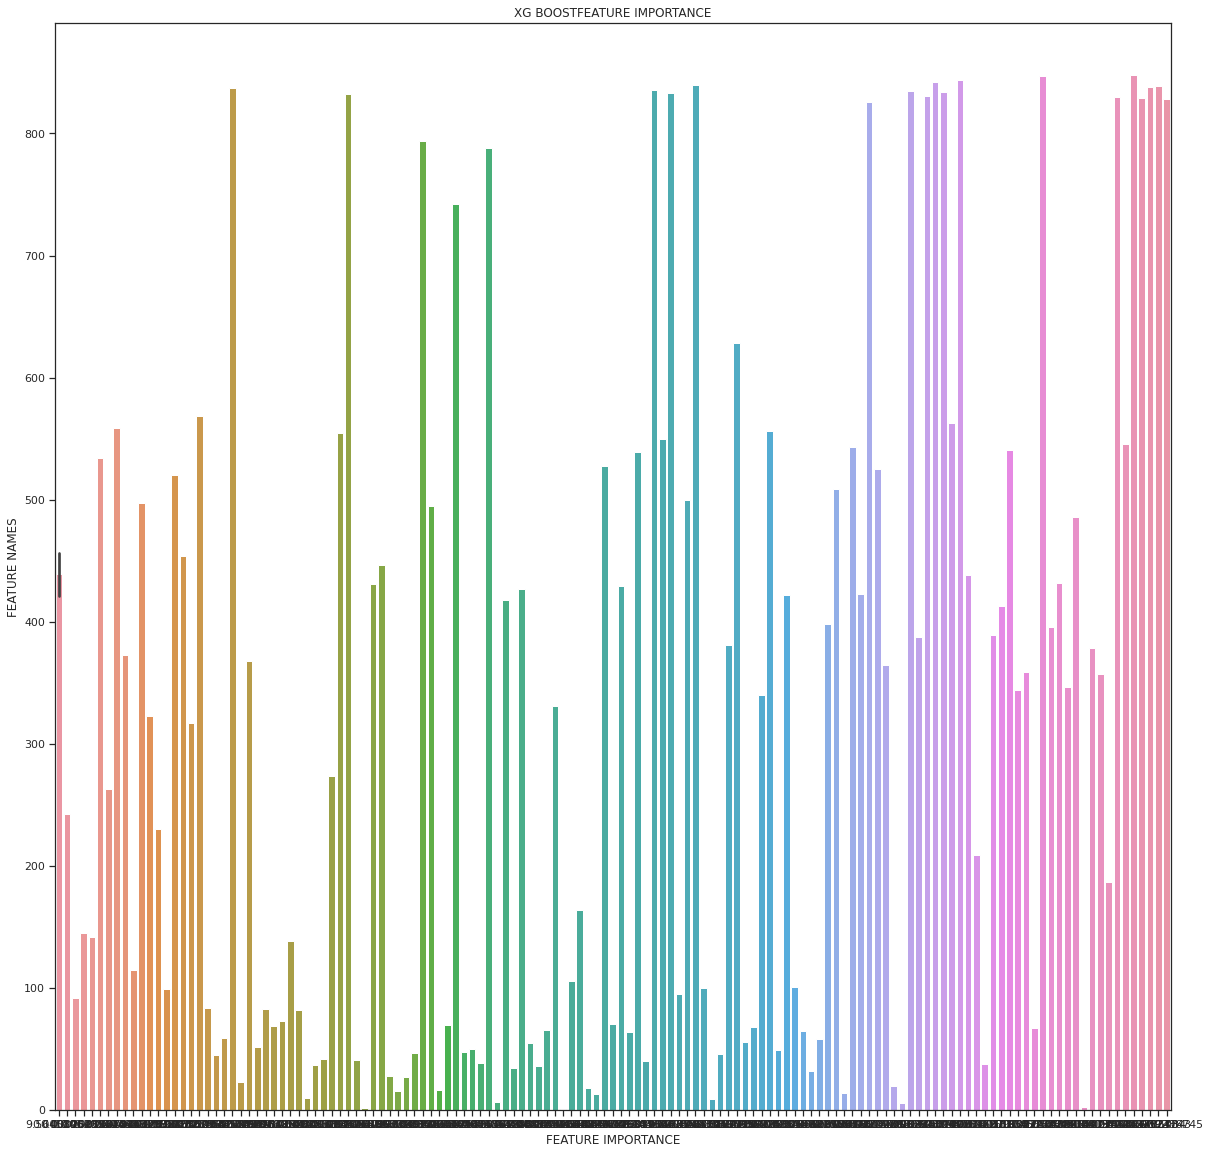

In [153]:
plot_feature_importance(xg_reg.feature_importances_,x_train.columns,'XG BOOST')

#Random Forest

##Hyperparameter tuning

In [126]:
model_rand = RandomForestRegressor()


n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap}


rf_random = RandomizedSearchCV(estimator = model_rand,param_distributions = random_grid,n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)


rf_random.fit(x_train, y_train)

# model_rand.best_score_
print ('Random grid: ', random_grid, '\n')

# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 50, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 110, 'bootstrap': False}  



In [148]:
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Best Parameters:  {'n_estimators': 50, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 110, 'bootstrap': False}  



In [149]:
from sklearn.ensemble import RandomForestRegressor

rnd_clf = RandomForestRegressor(n_estimators=20, min_samples_split='10', min_samples_leaf=4,max_features='sqrt',max_depth=10,bootstrap=True)
rnd_clf.fit(x_train, y_train)
y_pred_rnd_clf = rnd_clf.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


TypeError: ignored

In [ ]:
plot_feature_importance(rnd_clf.feature_importances_,x_train.columns,'RANDOM FOREST')

In [131]:
# rmse = np.sqrt(mean_squared_error(y_test, y_pred_rnd_clf))
# print("RMSE: %f" % (rmse))

# R2=r2_score(y_test,y_pred_rnd_clf)
# print("R2 Score: %f" % (R2))
# print()

NameError: ignored